# 有限单元法（编程部分）
卞培良, 顾鑫, 刘兆玮

河海大学 工程力学系

---

<peiliang.bian@hhu.edu.cn>

<xingu@hhu.edu.cn>

<zhaowei.liu@hhu.edu.cn>

## Julia 简介
Julia语言是一种和Python、R、matlab、Java、C++相比的计算机程序设计语言， 它的设计目标是既有Python这样的容易学习、快速完成原型设计的能力， 又能达到Java、C++这样的强类型语言的运行速度。 在当今的大数据时代是一种特别适合的程序语言。

### Julia基本语法
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/Julia_Cheat_Sheet_1.png" width="1000px"/>
</p>
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/Julia_Cheat_Sheet_2.png" width="1000px"/>
</p>

## 本篇笔记目标：咱们要干什么？

<!-- Solve the following problem using the finite element method. -->
利用有限单元法解决一个如图所示的一维问题

<p align="center">
<!-- <img src="picture/OneDElasticBar.png" width="500px"/> -->
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/OneDElasticBar.png" width="500px"/>
</p>

## 一维插值
<!-- Consider the axial displacements of a one dimensional bar, fixed at one end, subject to variable axial loading. -->

<!-- ![1DInterpolation](picture/OneDInterpolation.png) -->
<p align="center">
<!-- <img src="picture/OneDInterpolation.png" width="800px"/> -->
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/OneDInterpolation.png" width="800px"/>
</p>
<!--  -->
<!-- The mathematical functions that describe the variation of displacement over each discrete length are called **Shape Functions(形函数)**. These may be linear, quadratic, cubic or higher interpolations. In practice most elements are linear or quadratic.  -->
描述位移在每个离散长度上变化情况的数学函数被称为形函数（Shape Functions）。这些函数可以采用线性、二次、三次或更高次的插值形式。在实际应用中，大多数单元采用线性或二次插值。

#### 线性多项式与形函数推导
线性多项式的一般形式有
$$
u(x) = a_0 + a_1 x
$$
其中 $a_0$ 和 $a_1$ 为常数。

若假设每个单元内的变化是线性的，则位移函数 $u(x)$ 在相邻节点 $i$ 和 $i+1$ 之间的表达式为：
$$
u(x) = u_i + \frac{x-x_i }{x_{i+1}-x_i} (u_{i+1}-u_i),
\quad
x_i \leq x < x_{i+1}
$$
其中$u_i$ 表示在 $\xi$ 处的位移值，即 $u_i = u(\xi)$

<!-- This may be rearranged in the form of the sum of two linear functions, one associated with $u_i$ and the other with $u_{i+1}$ -->
上式可重新整理为两个线性函数的加权和，分别对应节点值 $u_i$ 和 $u_{i+1}$：
$$
u(x) 
= \frac{x_{i+1}-x}{x_{i+1}-x_i} u_i + \frac{x-x_i}{x_{i+1}-x_i} u_{i+1}
= N_i(x) u_i + N_{i+1}(x) u_{i+1} 
= \sum_{j=1}^{i+1} N_j(x) u_j
$$
形函数 $N_i(x)$ 在区间内从 **1** 线性递减至 **0**；形函数 $N_{i+1}(x)$ 在区间内从 **0** 线性递增至 **1**  

通过引入局部参数坐标系 $(\xi) \in [-1,1]$ 可简化形函数表达，再将其映射到实际物理域（即通过缩放转换到真实坐标）。其数学关系可表示为：
对每个单元采用局部节点编号系统：**节点1**：单元左端点；**节点2**：单元右端点。
形函数（定义在参数坐标 $\xi \in [-1,1]$ 区间上）最终可表示为局部节点编号与局部坐标的函数关系。
<!-- ![OneDParametricSpace](picture/OneDParametricSpace.png) -->
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/OneDParametricSpace.png" width="300px" />
</p>

<!-- The local coordinate, in terms of $x$, is given by  -->
在局部坐标系中，参数坐标$\xi$可以用$x$表示为
$$
\xi = \frac{2(x-x_1)}{x_2-x_1}-1=\frac{x-x_1}{l_\mathrm{e}/2}-1
$$
<!-- and the shape functions in terms of $\xi$ are -->
形函数则可以通过$\xi$表示为
$$
\begin{aligned}
    & N_1(\xi) = \frac{1-\xi}{2} \\
    & N_2(\xi) = \frac{1+\xi}{2}
\end{aligned}
$$

<!-- The uni-axial strain in the bar element is given by  -->
在杆单元中，单轴拉压应变表示为
$$
\varepsilon = \frac{\mathrm{d}u}{\mathrm{d}x}
=
\sum_{i=1}^2 \frac{\mathrm{d}N_i}{\mathrm{d}x} u_i
$$
<!-- Since the shape functions are in terms of the parametric variable $\xi$ the differential with respect to $x$ is calculated using the chain rule: -->
由于形函数通过参数变量 $\xi$ 表达，需借助链式求导法则计算其对物理坐标 $x$ 的导数：
$$
\frac{\mathrm{d}N_i}{\mathrm{d}x} = \frac{\mathrm{d}N_i}{\mathrm{d}\xi} \frac{\mathrm{d}\xi}{\mathrm{d}x}
=\frac{\mathrm{d}N_i}{\mathrm{d}\xi} \frac{1}{l_\mathrm{e}/2}
$$
注意其中
$$
\frac{\mathrm{d}\xi}{\mathrm{d}x} = \frac{1}{l_\mathrm{e}/2}
$$

<!-- The local shape function derivatives, obtained by differentiating the shape functions, are as follows;
 -->
对形函数进行微分后，得到在局部坐标$\xi$的导数表达式如下：
$$
\frac{\mathrm{d}N_1}{\mathrm{d}\xi} = -\frac{1}{2}
\quad
\text{and}
\quad
\frac{\mathrm{d}N_2}{\mathrm{d}\xi} = \frac{1}{2}
$$
<!-- The strain is calculated as -->
应变则可以计算表示为
$$
\varepsilon 
= \frac{\mathrm{d} u}{\mathrm{d} x} 
= \frac{\mathrm{d} N_1}{\mathrm{d} x} u_1 + \frac{\mathrm{d} N_2}{\mathrm{d} x} u_2
= \frac{\mathrm{d} N_1}{\mathrm{d} xi}\frac{\mathrm{d} \xi}{\mathrm{d} x} u_1 + \frac{\mathrm{d} N_2}{\mathrm{d} xi}\frac{\mathrm{d} \xi}{\mathrm{d} x} u_2
=
\left(-u_1 \frac{1}{l_\mathrm{e}} + u_2 \frac{1}{l_\mathrm{e}} \right)
=
\frac{u_2-u_1}{l_\mathrm{e}}
$$

<!-- This is the expected expression for **constant uni-axial strain (常应变)** over the element, which is consistent with the assumed linear variation of displacement over the element. -->
该结果给出了单元内**常应变**的表达式，与假定的单元内部位移线性变化完全一致。

In [1]:
struct TrussElement2{I}
    id::I
    Nodes::Vector{I}
end

#=
struct TrussElement2
    id
    Nodes
end

=# 

"""
    shapeFunctionL2(ξ::T)

Create a function to calculate the shape functions and their derivatives with the parametric coordinate xi.

N: Shape functions
dNdξ: derivatives w.r.t. ξ
ξ: natural coordinates (-1 ... +1)
"""
function shapeFunctionL2(ξ::T) where T
# shape function and derivatives for L2 elements

    N = [T(1) - ξ, T(1) + ξ] / 2
    dNdξ = [-T(0.5), T(0.5)]

    return N, dNdξ
end 

shapeFunctionL2

**形函数及其导数的可视化**  
现在我们可以绘制形函数 $N_i(\xi)$ 及其导数 $\frac{\mathrm{d}N_i}{\mathrm{d}\xi}$ 的曲线图：
> Plotting will use the Package `Plots` and `LaTeXStrings`
[https://docs.juliaplots.org/stable/animations/]

In [2]:
using Plots, LaTeXStrings

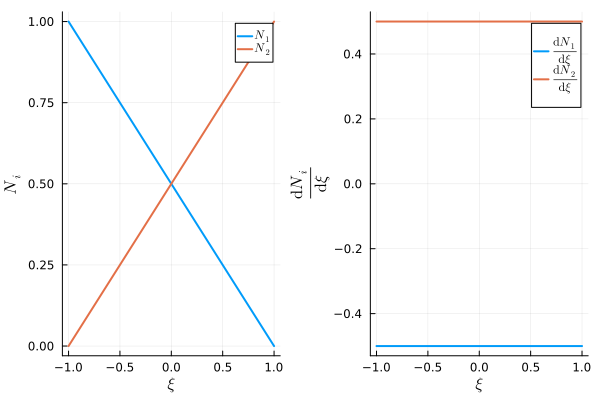

In [3]:
# Plot the shape functions and their derivatives
ξVec = collect(-1:0.01:1)

N1Vec = zero(ξVec)
N2Vec = zero(ξVec)
dN1Vec = zero(ξVec)
dN2Vec = zero(ξVec)

for (i, ξ) in enumerate(ξVec)
    Ntemp, dNtemp = shapeFunctionL2(ξ)
    N1Vec[i] = Ntemp[1]
    N2Vec[i] = Ntemp[2]
    dN1Vec[i] = dNtemp[1]
    dN2Vec[i] = dNtemp[2]
end

pN = plot(ξVec, N1Vec, xlabel=L"\xi", ylabel=L"N_i", label=L"N_1", linewidth=2)
plot!(pN, ξVec, N2Vec, label=L"N_2", linewidth=2)

pdN = plot(ξVec, dN1Vec, xlabel=L"\xi", ylabel=L"\frac{\mathrm{d}N_i}{\mathrm{d}\xi}", label=L"\frac{\mathrm{d}N_1}{\mathrm{d}\xi}", linewidth=2)
plot!(pdN, ξVec, dN2Vec,  label=L"\frac{\mathrm{d}N_2}{\mathrm{d}\xi}", linewidth=2)

plot(pN, pdN, layout=(1,2))

In [4]:
"""
    compute_J(telem::TrussElement2{I,T}, NodeDict::Dict, ξ::T)

compute the Jacobian of the parametric coordinate transformation
"""
function compute_J(Elem::TrussElement2{I}, NodeDict::Dict, ξ::T) where {I,T}
    J = (NodeDict[Elem.Nodes[2]] - NodeDict[Elem.Nodes[1]]) / 2
    return J
end

compute_J

In [5]:
"""
    meshTruss2(xL::T, xR::T, nelem::I) where {T, I}


Create a mesh of a truss element with 2 node Langranian element
"""
function meshTruss2(xL::T, xR::T, nelem::I) where {T, I}
    @assert xR > xL

    NodeDict = Dict()
    ElemDict = Dict()

    le = (xR - xL) / nelem

    for ke in 1:nelem
        NodeDict[ke] = xL + (ke-1) * le
        ElemDict[ke] = TrussElement2(ke, [ke, ke+1])
    end

    NodeDict[nelem+1] = xR
    
    return NodeDict,ElemDict
end

meshTruss2

In [ ]:
NodeDict_2,ElemDict_2 = meshTruss2(0.0, 4.0, 20)

(Dict{Any, Any}(5 => 0.8, 16 => 3.0, 20 => 3.8000000000000003, 12 => 2.2, 8 => 1.4000000000000001, 17 => 3.2, 1 => 0.0, 19 => 3.6, 6 => 1.0, 11 => 2.0…), Dict{Any, Any}(5 => TrussElement2{Int64}(5, [5, 6]), 16 => TrussElement2{Int64}(16, [16, 17]), 20 => TrussElement2{Int64}(20, [20, 21]), 12 => TrussElement2{Int64}(12, [12, 13]), 8 => TrussElement2{Int64}(8, [8, 9]), 17 => TrussElement2{Int64}(17, [17, 18]), 1 => TrussElement2{Int64}(1, [1, 2]), 19 => TrussElement2{Int64}(19, [19, 20]), 6 => TrussElement2{Int64}(6, [6, 7]), 11 => TrussElement2{Int64}(11, [11, 12])…))

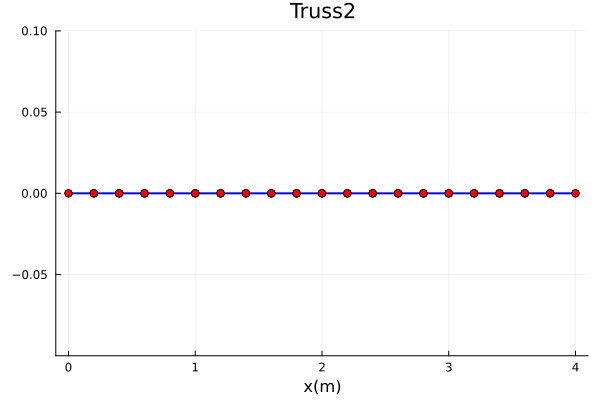

In [ ]:
# Plot the mesh
pmesh = plot(leg=false, xlabel="x(m)", ylim=(-0.1, 0.1), xlim=(-0.1, 4.1),title="Truss2")
for (kelem, elem) ∈ ElemDict_2
    plot!(pmesh,[NodeDict_2[elem.Nodes[1]], NodeDict_2[elem.Nodes[2]]],[0.0,0.0], color=:blue, linewidth=2, marker=:o, markersize=4, markercolor=:red)
end
pmesh


<!-- ### Approximate a function using a 3-noded (quadratic) element -->
### 用三节点（二次）单元近似位移函数
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/quadratic.png" width="300px" />
</p>

$$
\theta^\mathrm{e}(x)
=
\alpha_0^\mathrm{e}(x)
+
\alpha_1^\mathrm{e}(x) x 
+ 
\alpha_2^\mathrm{e}(x) x^2
=
\begin{bmatrix}
1 & x & x^2
\end{bmatrix}
\begin{bmatrix}
\alpha_0^\mathrm{e} \\
\alpha_1^\mathrm{e} \\
\alpha_2^\mathrm{e}
\end{bmatrix}
$$

$$
\begin{aligned}
    & N_1(\xi) = \frac{\xi(\xi-1)}{2} \\
    & N_2(\xi) = \frac{\xi(\xi+1)}{2} \\
    & N_3(\xi) = (1-\xi)(1+\xi)
\end{aligned}
$$

In [8]:
using ForwardDiff

In [9]:
struct TrussElement3{I}
    id::I
    Nodes::Vector{I}
end


"""
    shapeFunctionL3(ξ::T)

Create a function to calculate the shape functions and their derivatives with the parametric coordinate ξ.

N: Shape functions
dNdξ: derivatives w.r.t. ξ
ξ: natural coordinates (-1 ... +1)
"""
function shapeFunctionL3(ξ::T) where T
# shape function and derivatives for L2 elements

    N(η) = [ η*(η - T(1)), η*(T(1)+η), 2*(T(1)-η)*(T(1)+η)] / 2
    dNdξ = ForwardDiff.derivative(N, ξ)

    return N(ξ), dNdξ
end 

shapeFunctionL3

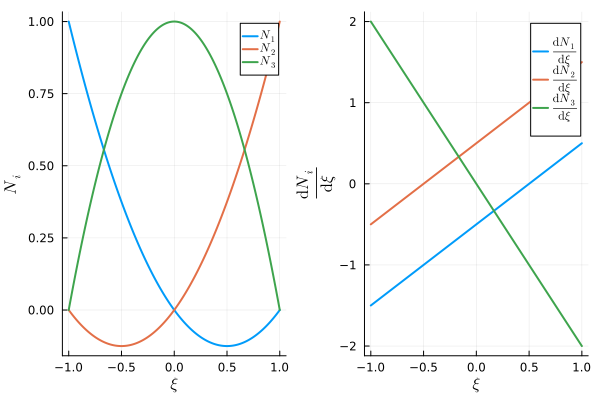

In [10]:
# Plot the shape functions and their derivatives
ξVec = collect(-1:0.01:1)

N1Vec = zero(ξVec)
N2Vec = zero(ξVec)
N3Vec = zero(ξVec)
dN1Vec = zero(ξVec)
dN2Vec = zero(ξVec)
dN3Vec = zero(ξVec)

for (i, ξ) in enumerate(ξVec)
    Ntemp, dNtemp = shapeFunctionL3(ξ)
    N1Vec[i] = Ntemp[1]
    N2Vec[i] = Ntemp[2]
    N3Vec[i] = Ntemp[3]
    dN1Vec[i] = dNtemp[1]
    dN2Vec[i] = dNtemp[2]
    dN3Vec[i] = dNtemp[3]
end

pN = plot(ξVec, N1Vec, xlabel=L"\xi", ylabel=L"N_i", label=L"N_1", linewidth=2)
plot!(pN, ξVec, N2Vec, label=L"N_2", linewidth=2)
plot!(pN, ξVec, N3Vec, label=L"N_3", linewidth=2)

pdN = plot(ξVec, dN1Vec, xlabel=L"\xi", ylabel=L"\frac{\mathrm{d}N_i}{\mathrm{d}\xi}", label=L"\frac{\mathrm{d}N_1}{\mathrm{d}\xi}", linewidth=2)
plot!(pdN, ξVec, dN2Vec,  label=L"\frac{\mathrm{d}N_2}{\mathrm{d}\xi}", linewidth=2)
plot!(pdN, ξVec, dN3Vec,  label=L"\frac{\mathrm{d}N_3}{\mathrm{d}\xi}", linewidth=2)

plot(pN, pdN, layout=(1,2))

In [11]:
"""
    meshTruss3(xL::T, xR::T, nelem::I) where {T, I}


Create a mesh of a truss element with 2 node Langranian element
"""
function meshTruss3(xL::T, xR::T, nelem::I) where {T, I}
    @assert xR > xL

    NodeDict = Dict()
    ElemDict = Dict()

    le = (xR - xL) / nelem

    for ke in 1:nelem
        NodeDict[2*(ke-1)+1] = xL + (ke-1) * le
        NodeDict[2*(ke-1)+2] = xL + (ke-1) * le +  le/2
        ElemDict[ke] = TrussElement3(ke, [2*(ke-1)+1, 2*(ke-1)+3, 2*(ke-1)+2])
    end

    NodeDict[2*nelem+1] = xR
    
    return NodeDict, ElemDict
end

meshTruss3

In [12]:
function compute_J(Elem::TrussElement3{I}, NodeDict::Dict, ξ::T) where {I,T}
    ~, 𝐁 = shapeFunctionL3(ξ)
    NodeCoords = [ NodeDict[i] for i ∈ Elem.Nodes]
    return  𝐁 ⋅ NodeCoords
end

compute_J (generic function with 2 methods)

> Julia uses [multiple dispatch(多重派发)](https://blog.csdn.net/weixin_41715077/article/details/104587189) as a paradigm, making it easy to express many object-oriented and functional programming patterns.

In [13]:
NodeDict_3,ElemDict_3 = meshTruss3(0.0, 4.0, 20)

(Dict{Any, Any}(5 => 0.4, 16 => 1.5000000000000002, 20 => 1.9000000000000001, 35 => 3.4000000000000004, 12 => 1.1, 24 => 2.3000000000000003, 28 => 2.7, 8 => 0.7000000000000001, 17 => 1.6, 30 => 2.9000000000000004…), Dict{Any, Any}(5 => TrussElement3{Int64}(5, [9, 11, 10]), 16 => TrussElement3{Int64}(16, [31, 33, 32]), 20 => TrussElement3{Int64}(20, [39, 41, 40]), 12 => TrussElement3{Int64}(12, [23, 25, 24]), 8 => TrussElement3{Int64}(8, [15, 17, 16]), 17 => TrussElement3{Int64}(17, [33, 35, 34]), 1 => TrussElement3{Int64}(1, [1, 3, 2]), 19 => TrussElement3{Int64}(19, [37, 39, 38]), 6 => TrussElement3{Int64}(6, [11, 13, 12]), 11 => TrussElement3{Int64}(11, [21, 23, 22])…))

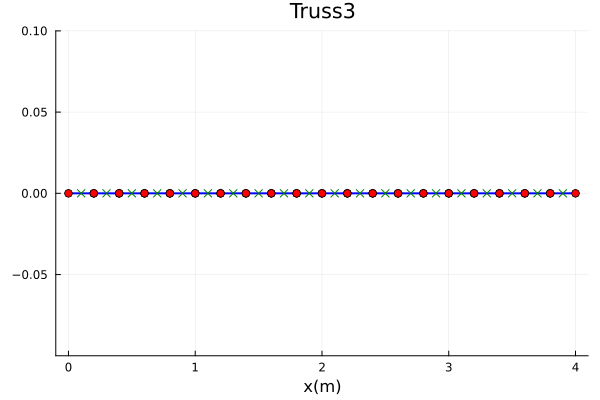

In [14]:
# Plot the mesh
pmesh2 = plot(leg=false, xlabel=L"x(m)", ylim=(-0.1, 0.1), xlim=(-0.1, 4.1), title="Truss3")
for (kelem, elem) ∈ ElemDict_3
    plot!(pmesh2,[NodeDict_3[elem.Nodes[1]], NodeDict_3[elem.Nodes[2]]],[0.0,0.0], color=:blue, linewidth=2, marker=:o, markersize=4, markercolor=:red)
    scatter!(pmesh2, [NodeDict_3[elem.Nodes[3]]],[0.0],markercolor=:green, marker=:x, markersize=4)
end
pmesh2

## 自由度分配
**自由度（dofs）的分布与编号**由函数`assignDOFs`实现。该函数将返回一个字典`DOFDict`，用于查询自由度的相关信息。例如，我们可以获取特定单元的自由度，这在整体劲度矩阵和残差向量的组装过程中是必需的。

In [15]:
"""
    assignDOFs(ElemDict::Dict)

Assign DOFs to the elements
"""
function assignDOFs(ElemDict::Dict)

    DOFDict = Dict()
    dof_now = 0
    
    for ke ∈ sort(collect(keys(ElemDict)))  # here just to guarantee the order is sorted
        for nodeid ∈ ElemDict[ke].Nodes
            if nodeid ∉ keys(DOFDict)
                dof_now += 1
                DOFDict[nodeid] = Dict((1=>dof_now))
            end
        end
    end
    
    return DOFDict
end

DOFDict_2 = assignDOFs(ElemDict_2)
DOFDict_3 = assignDOFs(ElemDict_3)

Dict{Any, Any} with 41 entries:
  5  => Dict(1=>4)
  16 => Dict(1=>17)
  20 => Dict(1=>21)
  35 => Dict(1=>34)
  12 => Dict(1=>13)
  24 => Dict(1=>25)
  28 => Dict(1=>29)
  8  => Dict(1=>9)
  17 => Dict(1=>16)
  30 => Dict(1=>31)
  1  => Dict(1=>1)
  19 => Dict(1=>18)
  23 => Dict(1=>22)
  22 => Dict(1=>23)
  6  => Dict(1=>7)
  32 => Dict(1=>33)
  11 => Dict(1=>10)
  37 => Dict(1=>36)
  36 => Dict(1=>37)
  ⋮  => ⋮

<!-- ## Finite Element Formulation
### Introduction
The essential components of a linear problem in solid mechanics, and the manner in which they are satisfied by the finite element method, are
1. **Compatibility**: this is satisfied by the shape functions providing continuity of displacements.
2. **Constitutive (stress-strain) relationship**: this is provided by the $\mathbb{C}_\mathrm{el}$ matrix.
3. **Boundary Conditions**: these are specified as nodal fixities or loads.
4. **Equilibrium**: these may be satisfied by virtual work equations (as below) or by applying a variational principle to ensure minimum potential energy, or by applying the *Galerkin Weighted residual method* directly to the equilibrium equations. -->
## 有限元列式  
### 基本概念  
固体力学线性问题的核心要素及其在有限元方法中的实现方式如下：


1. **相容性条件**：通过形函数保证位移场的连续性来实现。  
2. **本构关系（应力-应变关系）**：由单元刚度矩阵 $\mathbb{C}_\mathrm{el}$ 提供。  
3. **边界条件**：以节点约束或外载荷形式指定。  
4. **平衡方程**：可通过以下方式满足：虚功方程（如下所示）；应用最小势能变分原理；直接对平衡方程采用*伽辽金加权残值（余量）法* 。



<!-- ### Interpolation throughout a body -->
### 在区域内进行插值
<!-- $\boldsymbol{u}$ represents a displacement vector which can vary throughout the volume (or area) under consideration. -->
<!-- In any element e, the shape functions for all other elements are zero and thus the displacement at any point may be given by the product of a shape function and the element nodal displacements -->
位移矢量 $\boldsymbol{u}$ 表示研究域（体积域/面积域）内的空间变化位移场。
在任意单元 $e$ 内，非本单元的形函数值恒为零。域内任意点的位移仅由该单元节点位移决定，其为形函数N与节点位移的乘积
$$
\boldsymbol{u}(\boldsymbol{x})
=
\begin{bmatrix}
u_x(\boldsymbol{x}) \\
u_y(\boldsymbol{x}) \\
u_z(\boldsymbol{x})
\end{bmatrix}
=
\mathbf{N}^\mathrm{e}(\boldsymbol{x})\cdot \mathbf{u}^\mathrm{e}
$$
<!-- The strains at any point are given by  -->
任意一点的应变则表示为
$$
\boldsymbol{\varepsilon}(\boldsymbol{x})
=
\mathbf{B}\cdot \mathbf{u}(\boldsymbol{x})
$$


<!-- ### The role of the Jacobian matrix  -->
### 雅可比矩阵的作用
<!-- The $\mathbf{B}$ matrix contains shape function derivatives w.r.t. the Cartesian coordinates $x$, $y$ but the shape functions are defined in terms of the local parametric coordinates.  -->
$\mathbf{B}$ 矩阵包含形函数对**笛卡尔坐标系** $(x,y)$ 的导数，但形函数本身是基于**局部参数坐标** $(\xi,\eta)$ 定义的，
<!-- The Cartesian derivatives may be obtained as follows -->
因此需要通过链式法则进行坐标转换来求在笛卡尔坐标系中的导数：
$$
\begin{bmatrix}
    \frac{\partial N_i}{\partial x} \\
    \frac{\partial N_i}{\partial y} \\
    \frac{\partial N_i}{\partial z} \\
\end{bmatrix}
=
\mathbf{J}^{-1}
\begin{bmatrix}
    \frac{\partial N_i}{\partial \xi} \\
    \frac{\partial N_i}{\partial \eta} \\
    \frac{\partial N_i}{\partial \zeta} \\
\end{bmatrix}
$$
<!-- in which the Jacobian matrix $\mathbf{J}$ is defined as -->
其中雅可比（Jacobian）矩阵 $\mathbf{J}$被定义为
$$
\mathbf{J}
=
\begin{bmatrix}
    \frac{\partial x}{\partial \xi}   & \frac{\partial y}{\partial \xi}   & \frac{\partial z}{\partial \xi} \\
    \frac{\partial x}{\partial \eta}  & \frac{\partial y}{\partial \eta}  & \frac{\partial z}{\partial \eta} \\
    \frac{\partial x}{\partial \zeta} & \frac{\partial y}{\partial \zeta} & \frac{\partial z}{\partial \zeta} 
\end{bmatrix}
$$
<!-- The inverse of the Jacobian may be evaluated using Cramer’s rule. -->
雅可比矩阵的逆可以通过克拉默法则（Cramer’s rule）计算。


<!-- ### Virtual work equations  -->
### 虚功方程
<!-- A statement of virtual work for a body of volume $\varOmega$, with boundary surfaces $\varGamma$ is as follows -->
对于体积为 $\varOmega$、边界面为 $\varGamma$ 的连续体，其虚功原理表达式如下：

$$
\int_\varOmega \delta \boldsymbol{\varepsilon} : \boldsymbol{\sigma} \mathrm{d} \varOmega 
=
\int_{\varGamma_t} \delta  \boldsymbol{u} \cdot \boldsymbol{b}\mathrm{d} \varGamma
+
\int_{\varGamma_t} \delta  \boldsymbol{u} \cdot \overline{\boldsymbol{t}}\mathrm{d} \varGamma
+
\sum_{i=1}^{n_p}
\delta  \boldsymbol{u}_i \cdot \boldsymbol{P}_i
$$

<!-- - $\delta \boldsymbol{u}$: the virtual displacement vector;
- $\boldsymbol{b}$: body force per unit volume, this often relates to the weight density;
- $\overline{\boldsymbol{t}}$: the surface load per unit area, i.e., pressure;
- $\boldsymbol{P}_i$: the concentrated load at node $i$;
- $n_p$: the number of concentrated loads; -->
**式中符号说明**：  
- $\delta \boldsymbol{u}$：虚位移向量；
- $\boldsymbol{b}$：作用在体积内部的单位体积的体力矢量；
- $\boldsymbol{t}$：作用在边界的面力矢量；
- $\boldsymbol{P}_i$：节点$i$的集中力矢量；
-  $n_p$：集中力作用点数量。

<!-- Divided the domain into a number of elements and substitute the following expressions -->
将求解域 $\Omega$ 划分为若干有限单元，在每个单元 $\varOmega^e$ 内代入以下表达式：
$$
\boldsymbol{\varepsilon}(\boldsymbol{x})
=
\mathbf{B}\cdot \mathbf{u}(\boldsymbol{x})
,\quad
\boldsymbol{\sigma} = \mathbb{C}_\mathrm{el}\cdot \boldsymbol{\varepsilon}
,\quad
\delta \boldsymbol{u} = \mathbf{N}^\mathrm{e}(\boldsymbol{x}) \cdot \delta \mathbf{u}^\mathrm{e}
$$
带入虚功方程
$$
\sum_{e=1}^{n_e}
\int_{\varOmega_\mathrm{e}} \delta {\mathbf{u}^\mathrm{e}}^\mathrm{T} \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B} \mathbf{u}^\mathrm{e} \mathrm{d} \varOmega_\mathrm{e}
=
\sum_{e=1}^{n_e}
\int_{\varOmega_\mathrm{e}}
\delta {\mathbf{u}^\mathrm{e}}^\mathrm{T} 
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\boldsymbol{b}
\mathrm{d} \varOmega_\mathrm{e}
+
\sum_{e=1}^{n_e}
\int_{\varGamma_\mathrm{e}}
\delta {\mathbf{u}^\mathrm{e}}^\mathrm{T}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\overline{\boldsymbol{t}}
\mathrm{d} \varGamma_\mathrm{e}
+
\sum_{i=1}^{n_p}
\delta  \boldsymbol{u}_i \cdot \boldsymbol{P}_i
$$


###


### Assembly of the matrices: Scattering and Gathering
<!-- The nodal displacements are constants w.r.t the element integrations and thus can be taken outside the integrals; also the virtual displacements may be cancelled. The distribution function relates element to nodal nodes and is therefore also constant within an element and may be removed from the integration. The equations therefore become -->
节点位移相对于单元积分是常数，因此可以提到积分号外面；同时，虚位移可以被约掉。分布函数将单元与节点关联起来，因此在单元内也是常数，可以从积分中移除。因此，这些方程变为：
$$
\delta {\mathbf{u}_\mathrm{g}}^\mathrm{T}
\sum_{e=1}^{n_e}
{\mathbf{L}^\mathrm{e}}^\mathrm{T}
\int_{\varOmega_\mathrm{e}}  
    \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B}
\mathrm{d} \varOmega_\mathrm{e}
{\mathbf{L}^\mathrm{e}}
\mathbf{u}_\mathrm{g} 
=
\delta {\mathbf{u}_\mathrm{g}}^\mathrm{T}
\sum_{e=1}^{n_e}
\int_{\varOmega_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\boldsymbol{b}
\mathrm{d} \varOmega_\mathrm{e}
+
\delta {\mathbf{u}_\mathrm{g}}^\mathrm{T}
\sum_{e=1}^{n_e}
\int_{\varGamma_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\overline{\boldsymbol{t}}
\mathrm{d} \varGamma_\mathrm{e}
+
\sum_{i=1}^{n_p}
\delta  \boldsymbol{u}_i \cdot \boldsymbol{P}_i
$$
因此 
$$
\sum_{e=1}^{n_e}
{\mathbf{L}^\mathrm{e}}^\mathrm{T}
\int_{\varOmega_\mathrm{e}}  
    \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B}
\mathrm{d} \varOmega_\mathrm{e}
{\mathbf{L}^\mathrm{e}}
\mathbf{u}_\mathrm{g} 
=
\sum_{e=1}^{n_e}
\int_{\varOmega_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\boldsymbol{b}
\mathrm{d} \varOmega_\mathrm{e}
+
\sum_{e=1}^{n_e}
\int_{\varGamma_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\overline{\boldsymbol{t}}
\mathrm{d} \varGamma_\mathrm{e}
+
\mathbf{P}_\mathrm{p}
$$
<!-- 
The gather and scatter operations are illustrated in Figure for a one-dimensional mesh of two-node elements. The sequence of gather, compute and scatter is illustrated for two elements in the mesh. As can be seen, the displacements are gathered according to the node numbers of the element. Other nodal variables, such as nodal velocities and temperatures, can be gathered similarly. In the scatter, the nodal forces are then returned to the global force matrix according to the node numbers. The scatter operation is identical for the other nodal forces. -->
图示说明了对于由双节点单元构成的一维网格的收集（gather）和分散（scatter）操作。图中展示了网格中两个单元的收集、计算和分散的顺序。可以看出，位移是根据单元的节点编号进行收集的。其他节点变量，例如节点速度和温度，也可以类似地进行收集。在分散操作中，节点力随后会根据节点编号返回到全局力矩阵中。对于其他的节点力，分散操作是相同的。
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/gather.png" width="400px" />
</p>

<!-- ### The result of the FEM discritization -->
### 有限元离散的最终结果
<!-- Then the vector of external nodal forces  -->
节点外荷载向量
$$
\mathbf{P}_\mathrm{g}
=
\sum_{e=1}^{n_e}
\int_{\varOmega_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\boldsymbol{b}
\mathrm{d} \varOmega_\mathrm{e}
+
\sum_{e=1}^{n_e}
\int_{\varGamma_\mathrm{e}}
{\mathbf{N}^\mathrm{e}}^\mathrm{T}
\overline{\boldsymbol{t}}
\mathrm{d} \varGamma_\mathrm{e}
+
\mathbf{P}_\mathrm{p}
=\mathbf{P}_\mathrm{g,b} + \mathbf{P}_\mathrm{g,t}
+ \mathbf{P}_\mathrm{p}
$$
<!-- Element stiffness matrix  -->
单元劲度矩阵
$$
\mathbf{K}^\mathrm{e}
=
\int_{\varOmega_\mathrm{e}}
    \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B}
\mathrm{d} \varOmega_\mathrm{e}
$$
<!-- assembled stiffness matrix then becomes  -->
将劲度矩阵进行组装，得到
$$
\mathbf{K}_\mathrm{g}
=
\sum_{e=1}^{n_e}
{\mathbf{L}^\mathrm{e}}^\mathrm{T}\mathbf{K}^\mathrm{e}\mathbf{L}^\mathrm{e}
$$
<!-- Final system of equations -->
最终的线性方程组即为
$$
\mathbf{K}_\mathrm{g}\mathbf{u}_\mathrm{g}
=
\mathbf{P}_\mathrm{g}
$$

<!-- ## Numerical Integration -->
## 数值积分
<!-- ### Summation and the mid-point rule  -->
### 求和与中点法则
<!-- In 1D one of the most straightforward methods of numerical integration is the mid point rule. For a function $f(x)$, the integral between limits $a$ and $b$ may be approximated by the mid-point rule as follows: -->
在一维情况下，最直接的数值积分方法之一是中点法则。对于函数$f(x)$，其在区间a到b上的积分可以用中点法则近似如下：
<p align="center">
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/midpointrule.png" width="800px" />
</p>

### 高斯求积（ Gauss-Legendre Rules ）
<!-- There are many more efficient rules than the mid-point rule, for example Simpsons’ rules are commonly applied. However, over a fixed interval a highly efficient set of integration rules are the Gauss-Legendre rules. These are defined over an interval $-1$ to $+1$. Using the parametric coordinate $\xi$, the integral may be approximated (or determined exactly) as follows; -->
有许多比中点法则更高效的积分法则，例如，辛普森法则（Simpsons’ rules）就经常被应用。然而，在固定区间上，一组非常高效的积分法则就是高斯-勒让德法则。这些法则定义在$−1$到$+1$的区间上。使用参数坐标$\xi$，积分可以被近似（或精确计算）如下：
$$
\begin{aligned}
& \overline{I} = \int_{-1}^{+1} f(\xi) \mathrm{d}\xi
\\
& \overline{I}_p = w_1 f(\xi_1) + w_2 f(\xi_2) + \cdots + w_p f(\xi_p) = \sum_{i=1}^{p} w_i f(\xi_i)
\end{aligned}
$$
<!-- where, $p$ is the number of points in the rule. Thus one refers, for example, to a 3 point Gauss rule if $p=3$. $w_i$ are weights and $\overline{xi_i}$ are the sampling positions. A table of these for 1, 2 and 3 point rules are given below; -->
“其中，$p$是法则中点的数量。因此，例如，如果$p=3$，就称为3点高斯法则。$w_i$是权重，$\xi$是采样位置。下面给出了1点、2点和3点法则的这些值表。

<!-- #### Gauss-Legendre positions and weights -->
#### 高斯积分点位置及相应权重
<!-- The Gauss-Legendre rules are very efficient and a $p$ point rule can integrate exactly a polynomial of order $2p-1$ or less, thus a $3$ point rule can integrate exactly a polynomial of degree $5$. -->
高斯积分法则非常高效，一个$p$点法则可以精确地积分一个阶数为2p−1或更低的多项式，因此一个3点法则可以精确地积分一个次数为5的多项式。
<p align="center">
    <img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/gaussquadrature.png" width="400px" />
</p>

<!-- In order to integrate a 1-D function defined over an interval other than $-1$ to $+1$, the variable (e.g. $x$), is scaled to the interval of the parametric coordinate. In the case of parametric finite elements, shape functions are defined in terms of local coordinates and these are mapped to Cartesian coordinates. This makes Gauss-Legendre rules very convenient for such F.E. integrations  -->
为了对定义在非−1到+1区间上的一维函数进行积分，需要将变量（例如$x$）缩放到参数坐标的区间。在参数化有限元的情况下，形函数是用局部坐标定义的，并且这些局部坐标会映射到笛卡尔坐标系中。这使得高斯积分对于这类有限元积分非常方便。

<!-- #### Example  -->
#### 例子
<!-- Compare the integral of the following function, over the interval $\xi=-1$ to $+1$, with that obtained from $2$ point Gauss-Legendre integration. -->
将以下函数在区间$ξ=−1$到$+1$上的积分，与通过2点高斯积分得到的结果进行比较。
$$
f(\xi) = 2-\xi+3\xi^2
$$
And
$$
\int_{-1}^{+1} f(\xi) \mathrm{d}\xi
= \left.\left(2\xi-\frac{\xi^2}{2}+\xi^3 \right)\right\vert_{-1}^{+1}
= 6
$$
其中
$$
f(\overline{\xi}_1) = f\left(-\frac{1}{\sqrt{3}}\right) = 2 + \frac{1}{\sqrt{3}} + 1 = \left(3+\frac{1}{\sqrt{3}}\right)
\quad
f(\overline{\xi}_2) = f\left(\frac{1}{\sqrt{3}}\right) = 2 - \frac{1}{\sqrt{3}} + 1 = \left(3-\frac{1}{\sqrt{3}}\right)
$$
$$
w_1=w_2=1
$$
因此
$$
\overline{I}_2 = \left(3+\frac{1}{\sqrt{3}}\right)\times 1 + \left(3-\frac{1}{\sqrt{3}}\right) \times 1 
$$
<!-- which, as expected, is the exact definition integral in this case. -->
正如所预期的，在这种情况下，这正是积分的精确定义。

<!-- > QUESTION: How to implement it in `Julia`? -->
> 问题: 如何在 `Julia` 中实现?

<!-- **Example** Integrate the function $f(\xi) = 2 - x + 3x^2$ over the interval $\xi=-1$ to $+1$ using the Gauss-Legendre rule. -->
使用高斯积分计算函数$f(\xi) = 2 - x + 3x^2$在区间$\xi=-1$到$+1$积分。

<!-- Activate the `GaussQuadrature` package. -->
激活Julia程序包`GaussQuadrature`

In [16]:
using GaussQuadrature, LinearAlgebra, Test

In [17]:
ξV , wV = legendre(2)
f(x) = 2 - x + 3*x^2

@test f.(ξV) ⋅ wV ≈ 6

Test Passed

<!-- #### Numerical integration over mapped area  -->
#### 在映射的参数域上进行数值积分
<!-- An integral expressed in Cartesian (global) coordinates may be expressed in parametric coordinates as follows -->
用笛卡尔（全局）坐标表示的积分可以如下表示为参数坐标下的形式：
$$
\int_{\varOmega_\mathrm{e}} f(x) \mathrm{d} x 
=
\int_{-1}^1 f(x(\eta)) \mathrm{det} J \mathrm{d} \eta 
$$
<!-- where $\varOmega_\mathrm{e}$ is the element area of integration. -->
其中$\varOmega_\mathrm{e}$是被积单元的面积。

<!-- For 1-D case, the relationship between the elemental area $\mathrm{d}x$ and the parametric elemental area $\mathrm{d}\eta$ is as follows -->
对于一维问题，在笛卡尔坐标下的 $\mathrm{d}x$ 和在参数坐标下的$\mathrm{d}\eta$为
$$
\mathrm{d}x = \mathrm{det}  \mathrm{d} J\eta
$$


<!-- **Example** Integrate the function $f(x) = 2 - x + 3x^2$ over the interval $x=-5$ to $+10$ using the Gauss-Legendre rule. -->
**示例：** 用高斯积分法在区间$x=-5$ 到 $+10$对函数$f(x) = 2 - x + 3x^2$ 进行积分。

*提示：*笛卡尔坐标和参数坐标可以通过如下方式转换
$$
x = -5 + \frac{15}{2} (\eta + 1)
$$

结果为
$$
\int_{-5}^{10} 2 - x + 3x^2 \mathrm{d} x 
= \left.(2x -\frac{x^2}{2} + x^3 )\right|_{-5}^{10}
= 1117.5
$$

In [18]:
detJ = 15*0.5
xV = -5.0 .+ detJ * (ξV .+ 1.0) 

@test f.(xV) ⋅ wV * detJ ≈ 1117.5

: 

<!-- ### Evaluation of element stiffness matrix -->
### 计算单元劲度矩阵
<!-- The element shape functions and derivatives are defined in local parametric coordinates, thus the integral is most conveniently carried out over the parametric domain. Here the element is 2D, thus the integration over the volume becomes the integration over the element area multiplied by the thickness of the element  -->
单元形函数及其导数是在局部参数坐标系中定义的，因此积分最方便在参数域内进行。这里单元是二维（2D）的，因此在体积上的积分就变成了在单元面积上的积分再乘以单元的厚度。
$$
\mathbf{K}_\mathrm{e} 
=
\int_{\varOmega_\mathrm{e}}
    \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B}
\mathrm{d} \varOmega_\mathrm{e}
=
\int_{-1}^{+1}
    \mathbf{B}^\mathrm{T} \mathbb{C}_\mathrm{el} \mathbf{B} 
    \mathrm{det} J A
\mathrm{d}  \xi
$$
<!-- For 1-D case, $A$ is the cross-section aera. The integral over the element volume is carried out using the numerical integration techniques discussed earlier. -->
对于一维情况，$A$是杆的横截面积。单元体积上的积分是使用前述的数值积分技术进行的。

<!-- Using Gauss Quadrature rules for 1-D elements, the matrix now computed as -->
对一维单元使用高斯积分法，劲度矩阵通过计算可得
$$
\mathbf{K}_\mathrm{e} 
=
\sum_{i=1}^{n_\mathrm{g}}
\mathbf{B}^\mathrm{T}(\xi_i) \mathbb{C}_\mathrm{el} \mathbf{B}(\xi_i)
\mathrm{det} J(\xi_i) A w_i
$$
<!-- where $\xi_i$ and $w_i$ are the $i^\mathrm{th}$ parametric coordinate and weight in Gaussian Quadrature. -->
其中 $\xi_i$ 和 $w_i$ 是第$i^\mathrm{th}$个高斯点的参数坐标和对应的权。

<!-- ## A case study of 1D finite element method -->
<!-- ### Problem description -->
## 一维有限单元法算例
### 算例描述
<!-- Consider the 1D elastic bar with boundary conditions, loading, and material properties shown in Fig. 1. -->
考虑如图 1 所示的具有边界条件、载荷和材料属性的一维弹性杆。
<p align="center">
<!-- ![1DElasticBar](picture/OneDElasticBar.png) -->
<img src="https://raw.githubusercontent.com/bplcn/FiniteElementMethodProgramming/master/picture/OneDElasticBar.png" width="600px">
<\p>

<!-- The strong form of the relation governing the displacement u of the bar is given by -->
描述该杆位移$u$的控制方程的强形式由下式给出：
$$
\begin{aligned}
& \frac{\mathrm{d}}{\mathrm{d}x}\left(
EA \frac{\mathrm{d}u}{\mathrm{d}x} 
\right)  
+b
= 0
\quad 
\text{in}\ \varOmega:=x\in(0,1)
\\
& \sigma_n = \left( E \frac{\mathrm{d}u}{\mathrm{d}x} \right) \quad \text{on}\ \varGamma_t 
\\
& u=\overline{u} \quad \text{on}\ \varGamma_u
\end{aligned}
$$

<!-- > Question: Load & BC ? -->
<!-- 
> Q: Why is it allowed to approximate this problem as a 1D problem?

A: The solution u(x), the material properties E(x), and the geometry A(x) only vary in one dimension;

> Q: At which end of the bar is the natural (force) boundary condition applied?

A: At $x = 4 \mathrm{m}$;

> Q: At which end of the bar is the essential (geometric) boundary condition applied?

A: At $x = 0 \mathrm{m}$ -->

`问题：`荷载与边界条件（BC）
- **Q**: 为何允许简化为一维问题？**A**：由于以下参量仅沿单方向变化：位移解 $u(x)$、材料参数 $E(x)$和几何属性 $A(x)$；
- **Q**: 自然边界条件（力边界）施加位置？ **A**：施加于杆件 $x = 4\,\mathrm{m}$ 端；
- **Q**: 位移边界条件施加位置？**A**：施加于杆件 $x = 0\,\mathrm{m}$ 端。


<!-- Let's define a `struct` to store the information of the bar.  -->
现在让我们定义一个`结构体`（`struct`）来存储杆的信息。

In [19]:
struct BarInfo{T}
    E::T
    A::T
end

<!-- ### Analytical solution of the problem -->
### 该根杆的解析解
<!-- For simple problems in 1D we can derive the exact solution. This is generally not possible for all but the simplest problems - hence the need to solve the equations approximately using the FEM. -->
对于一维的简单问题，我们可以推导出精确解。但除了最简单的问题外，这通常是不可能的——因此需要使用有限元法（FEM）近似地求解这些方程。
$$
\frac{\mathrm{d}}{\mathrm{d}x}\left(
EA \frac{\mathrm{d}u}{\mathrm{d}x} 
\right)  
+b
= 0
\Rightarrow 
\frac{\mathrm{d}^2 u }{\mathrm{d} x^2} 
=
\underbrace{-\frac{b}{EA}}_{g}
$$
积分一次可得 
$$
\frac{\mathrm{d} u}{\mathrm{d} x} 
=
gx+c_1
$$
$$
\sigma_n
=\left(E \frac{\mathrm{d}u}{\mathrm{d}x} \right) n 
=\overline{t}
\quad 
\text{on}\ \varGamma_t
\Rightarrow
E \frac{\mathrm{d}u}{\mathrm{d}x} = E[gx+c_1]=\overline{t}=1\quad \text{at} x=4 
\Rightarrow
c_1 = \frac{7}{8}
$$
再积分一次，可得
$$
u(x) = \frac{1}{2}g x^2 + c_1 x + c_2
$$
<!-- where $c_2$ is another constant of integration. Use the essential boundary condition to determine the value of $c_2$. -->
其中$c_2$是另一个积分常数。利用位移边界值就可以确定$c_2$的值。
$$
u=\overline{u} \quad \text{on}\ \varGamma_u
\Rightarrow 
u=\overline{u}=0\quad \text{at}\ x=0
\Rightarrow 
c_2 = 0
$$
<!-- Hence show that the displacement and the stress along the bar are given by -->
因此杆中的位移和应力值可以表示为
$$
\begin{aligned}
    u(x) = -\frac{3}{32}x^2 + \frac{7}{8}x
    \\
    \sigma = E \frac{\mathrm{d}u}{\mathrm{d}x} = -\frac{3}{2}x + 7
\end{aligned}
$$

<!-- the expression for the stress above could have been obtained from basic mechanics as -->
利用一些基本的力学知识，可以得到应力的具体表达式
$$
\sigma(x) = \overline{t}+\frac{b(l-x)}{A}
$$
<!-- The stress at $x=0$ is $\sigma=t + bl/A$. This makes sense as it is the stress due to the traction and the body force. -->
在$x=0$处应力$\sigma=t + bl/A$。其等于单位面积上面力与体力的合力；
<!-- The stress at $x = l$ is $\sigma  = t$. This makes sense as it is the applied traction. -->
在$x = l$处$\sigma  = t$，其与面力值相等

<!-- Plot the distribution of the displacement and the stress along the length ofthe bar. -->
我们可以画出位移和应力沿杆轴线方向的分布情况：

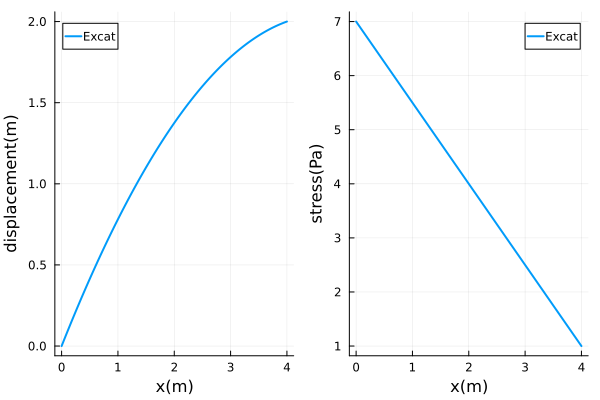

In [20]:
# plot the analytical solution
xVec = range(0, 4, length=100)

u_a(x) = -3/32*x^2 + 7/8*x
σ_a(x) = -3/2*x + 7

p_u = plot(xVec, u_a.(xVec), xlabel="x(m)", ylabel="displacement(m)", label="Excat", linewidth=2)
p_σ = plot(xVec, σ_a.(xVec), xlabel="x(m)", ylabel="stress(Pa)", label="Excat", linewidth=2)

plot(p_u, p_σ, layout=(1,2))

<!-- ### Strong form to weak form -->
### 由强形式推导得到弱形式
<!-- The first step in deriving the weak form is to multiply the strong form by a test function $\delta u=0$. Thus -->
推导弱形式的第一步是将强形式中的控制方程乘以一个**测试函数** $\delta u$，其需要满足在边界条件上为零
$$
\delta u = 0 \quad \text{on}\ \varGamma_u
$$

$$
\frac{\mathrm{d}}{\mathrm{d}x} \left( \delta u EA \frac{\mathrm{d} u}{\mathrm{d} x} \right) \mathrm{d} x
=0
\quad
\Rightarrow
\quad
0 = \int_\varOmega \delta u \frac{\mathrm{d}}{\mathrm{d}x} \left(EA \frac{\mathrm{d}u}{\mathrm{d}x} \right) \mathrm{d}x
+ \int_\varOmega \delta u b \mathrm{d}x
$$
根据微分规则
$$
\int_\varOmega \frac{\mathrm{d}}{\mathrm{d}x} \left( \delta u EA \frac{\mathrm{d} u}{\mathrm{d} x} \right) \mathrm{d} x
=
\int_\varOmega \delta u \frac{\mathrm{d}}{\mathrm{d}x} \left( EA \frac{\mathrm{d} u }{\mathrm{d} x} \right) \mathrm{d} x
+
\int_\varOmega \frac{\mathrm{d}\delta u }{\mathrm{d}x}  \left( EA \frac{\mathrm{d} u }{\mathrm{d} x} \right) \mathrm{d} x
$$
<!-- Hence the equation form can be written as -->
因此控制方程可以被重新整理成
$$
0 = - \int_\varOmega \frac{\mathrm{d}\delta u }{\mathrm{d}x}  \left( EA \frac{\mathrm{d} u }{\mathrm{d} x} \right) \mathrm{d} x
+
\int_\varOmega \frac{\mathrm{d}}{\mathrm{d}x} \left( \delta u EA \frac{\mathrm{d} u }{\mathrm{d} x} \right) \mathrm{d} x
+
\int_\varOmega \delta u b \mathrm{d}x
$$
<!-- Recall the procedure of integration by parts where f is some function: -->
根据分部积分规则（或一维高斯散度定理）
$$
\begin{aligned}
\int_{\varOmega}\delta u\frac{\mathrm{d}f}{\mathrm{d}x} \mathrm{d}x& 
= \left[(\delta uf)|_{x=l}-(\delta uf)|_{x=0}\right]
-\int_\varOmega f\frac{\mathrm{d}\delta u}{\mathrm{d}x}\mathrm{d}x \\
&=(\delta u f_n)|_{\varGamma_u}+(\delta u f_n)|_{\varGamma_t}-\int_\varOmega f\frac{\mathrm{d}\delta u}{\mathrm{d}x}\mathrm{d}x
\end{aligned}
$$
<!-- such that -->
于是
$$
0=
-\int_{\varOmega}\frac{\mathrm{d}\delta u}{\mathrm{d}x}\left(EA\frac{\mathrm{d}u}{\mathrm{d}x}\right)\mathrm{d}x
+
\left.\left(\delta u EA \frac{\mathrm{d}u}{\mathrm{d}x}n\right)\right|_{\varGamma}+\int_{\varOmega}\delta u b \mathrm{d}x
$$
<!-- Recall that $\delta u = 0$ on $\varGamma_u$ hence -->
利用位移边界$\varGamma_u$ 上$\delta u = 0$，可以进一步得到
$$
0=
-\int_{\varOmega}\frac{\mathrm{d}\delta u}{\mathrm{d}x}\left(EA\frac{\mathrm{d}u}{\mathrm{d}x}\right)\mathrm{d}x
+
\left.\left(\delta u EA \frac{\mathrm{d}u}{\mathrm{d}x}n\right)\right|_{\varGamma_t}+\int_{\varOmega}\delta u b \mathrm{d}x
$$
<!-- Note that the normal n enters so that the boundary term hold on either boundary. Using the definition of the natural boundary condition we get -->
注意，法向量n的引入使得边界项在任一边界上都成立。使用自然边界条件的定义，我们得到：
$$
0=
-\int_{\varOmega}\frac{\mathrm{d}\delta u}{\mathrm{d}x}\left(EA\frac{\mathrm{d}u}{\mathrm{d}x}\right)\mathrm{d}x
+
\left.\left(\delta u A \overline{t}\right)\right|_{\varGamma_t}+\int_{\varOmega}\delta u b \mathrm{d}x
$$
<!-- Rearranging we obtain the weak form as -->
整理可得弱形式的表达式为
$$
\int_\varOmega\frac{\mathrm{d}\delta u}{\mathrm{d}x}AE\frac{\mathrm{d}u}{\mathrm{d}x}\mathrm{d}x=(\delta uA\bar{t})|_{\varGamma_t}+\int_\varOmega\delta ub\mathrm{d}x
$$

<!-- #### A simple solution: Choose a linear function as trail and test functions -->
#### 简简单单来求解：用一个线性函数作为试验与测试函数
<!-- Obtain a solution to the weak form by using a trial solution and a test function of the form -->
通过使用如下形式的试验和测试函数，获得弱形式的一个解：
$$
\begin{aligned}
    u(x) &=\alpha_{0}+\alpha_{1}x \\
    \delta u(x)&=\beta_{0}+\beta_{1}x
\end{aligned}
$$
<!-- which should satisfy the boundary condition on the left side $x=0$ -->
其在杆的左端 $x=0$满足位移边界条件
$$
\begin{aligned}
& u(x=0)=0\Longrightarrow\alpha_{0}=0 \\
& \delta u(x=0)=0\Longrightarrow\beta_{0}=0
\end{aligned}
\Longrightarrow
\begin{aligned}
& \frac{\mathrm{d}u}{\mathrm{d}x}=\alpha_{1} \\
& \frac{\mathrm{d}\delta u}{\mathrm{d}x}=\beta_{1}
\end{aligned}
$$

<!-- Take the explicit expression into the weak form, and it becomes -->
将具体表达式带入弱形式方程可得
$$
\int_{\varOmega}\frac{\mathrm{d}{\delta}u}{\mathrm{d}x}EA\frac{\mathrm{d}{u}}{\mathrm{d}x}\mathrm{d}x=(\delta uA\overline{{t}})|_{\varGamma_{t}}+\int_{\varOmega}\delta ub\mathrm{d}x
$$
$$
\begin{aligned}
    \int_0^4\beta_1 EA \alpha_1\mathrm{d}x&=(\beta_1xA\overline{t})|_{\varGamma_t}+\int_0^4\beta_1xb\mathrm{d}x
\end{aligned}
$$
<!-- Finally, -->
最终可得
$$
\begin{aligned}
    4\beta_1 EA \alpha_1&=\beta_14A+24\beta_1
\end{aligned}
$$
<!-- $beta_1 \neq 0$ is a constant. Thus,  -->
由于$\beta_1\neq 0$ 并不是一个常数，因此
$$
4\beta_1\left(AE\alpha_1-A-6\right)=0
\Rightarrow
\alpha_1=\frac{A+6}{AE}=\frac{8}{16}=\frac{1}{2}
$$

<!-- The solution of the problem with the given trial and test function is  -->
在给定的试验和测试函数下，解的最终表达式为
$$
\begin{aligned}
    u(x)&=\frac{x}{2}
    \\
    \sigma(x)&=E\frac{\mathrm d u}{\mathrm d x}=4
\end{aligned}
$$

<!-- Let's figure it out what it is! -->
将该解可以进行绘制：

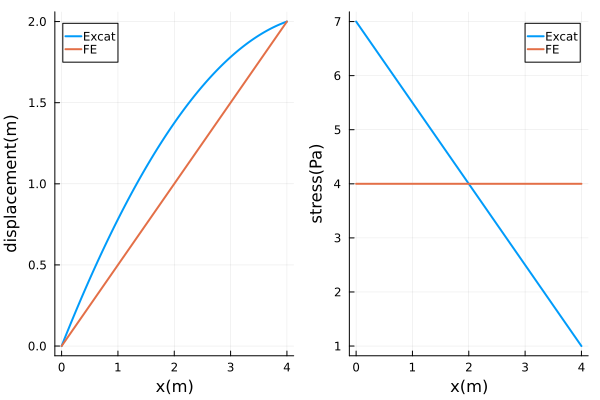

In [21]:
# plot the analytical solution
xVec = range(0, 4, length=100)

u_w1(x) = x / 2
σ_w1(x) = one(x)*4

p_u_1 = plot(xVec, u_a.(xVec), xlabel="x(m)", ylabel="displacement(m)", label="Excat", linewidth=2)
plot!(p_u_1, xVec, u_w1.(xVec), label="FE", linewidth=2)

p_σ_1 = plot(xVec, σ_a.(xVec), xlabel="x(m)", ylabel="stress(Pa)", label="Excat", linewidth=2)
plot!(p_σ_1, xVec, σ_w1.(xVec), label="FE", linewidth=2)

plot(p_u_1, p_σ_1, layout=(1,2))


### Finite element discretization
### 有限单元离散
<!-- The displacement $u$, the test function $\delta u$, and their gradients are approximated on each element by -->
在每个单元内，位移（试验函数）场$u$、测试函数场 $\delta u$，以及其导数被近似成为
$$
\begin{aligned}
& 
u^\mathrm{e}(x) = \mathbf{N}^\mathrm{e}\cdot \mathbf{u}^\mathrm{e}
,
\quad
\frac{\mathrm{d}u^\mathrm{e}}{\mathrm{d}x} = \mathbf{B}^\mathrm{e}\cdot \mathbf{u}^\mathrm{e}
\\
& 
\delta u^e(x)^\mathrm{T}=(\mathbf{N}^\mathrm{e}\delta\mathbf{u}^e)^\mathrm{T}={\delta\mathbf{u}^e}^\mathrm{T}{\mathbf{N}^\mathrm{e}}^\mathrm{T}
,
\quad
\left[\frac{\mathrm{d}\delta u^\mathrm{e}(x)}{\mathrm{d}x}\right]^\mathrm{T}=(\mathbf{B}^\mathrm{e}\delta\mathbf{u}^\mathrm{e})^\mathrm{T}=\delta\mathbf{u}^{\mathrm{e}\mathrm{T}}\mathbf{B}^{\mathrm{e}\mathrm{T}}
\end{aligned}
$$
<!-- where $\mathbf{u}^\mathrm{e}$ is the vector of the displacement at the nodes of the element. -->
其中$\mathbf{u}^\mathrm{e}$为单元附属节点位移向量。

<!-- Show that the weak form can be expressed in terms of the element contributions as -->
弱形式则可以表示成为每个单元累加的形式
$$
\sum_{e=1}^{n_\mathrm{el}}
    {\delta\mathbf{u}^{\mathrm{e}}}^{\mathrm{T}}
        \left(
            \underbrace{
                \int_{\varOmega^e}\left[{\mathbf{B}^{\mathrm{e}}}^\mathrm{T}E^\mathrm{e}A^\mathrm{e}\mathbf{B} \right]
                \mathrm{d}x
            }_{\mathbf{K}^e}\ \mathbf{u}^e
            -
            \underbrace{
                ({\mathbf{N}^{\mathrm{e}}}^{\mathrm{T}} A^{\mathrm{e}}\overline{t})|_{\varGamma_t}}_{\mathbf{f}_{\varGamma^{\mathrm{e}}
            }}
            -
            \underbrace{
                \int_{\varOmega^{\mathrm{e}}}{\mathbf{N}^{{\mathrm{e}}}}^\mathrm{T} b \mathrm{d}x}_{\mathbf{f}_{\varOmega^{\mathrm{e}}}
            }
        \right)=0
$$
<!-- where $\mathbf{K}^\mathrm{e}$ is the element stiffness matrix (单元**劲度**矩阵) and $\mathbf{f}^\mathrm{e}=\mathbf{f}_{\varGamma^\mathrm{e}}+\mathbf{f}_{\varOmega^\mathrm{e}}$ is the element force vector (单元荷载向量). -->
其中$\mathbf{K}^\mathrm{e}$为单元劲度矩阵；$\mathbf{f}^\mathrm{e}=\mathbf{f}_{\varGamma^\mathrm{e}}+\mathbf{f}_{\varOmega^\mathrm{e}}$为单元荷载向量。

<!-- The next step in the FEM is to link the displacement vector $\mathbf{u}^\mathrm{e}$ for each element to the global vector of nodal displacements $\mathbf{u}$.  -->
FEM离散的下一步就是将每个单元的位移向量$\mathbf{u}^\mathrm{e}$与全局节点位移向量 $\mathbf{u}$联系起来。

Use the element scatter matrix ${\mathbf{L}^\mathrm{e}}^\mathrm{T}$ to write the equation above as 
$$
\begin{aligned}
& 
\delta\mathbf{u}^{\mathrm{T}}
\sum_{e=1}^{n_\mathrm{el}}\left(
    \left( {\mathbf{L}^\mathrm{e}}^\mathrm{T} \mathbf{K}^\mathrm{e} \mathbf{L}^\mathrm{e} \right) \cdot \mathbf{u}
    -
    {\mathbf{L}^\mathrm{e}}^\mathrm{T} \cdot \mathbf{f}^\mathrm{e}
\right)
=0
\\
&
\delta\mathbf{u}^{\mathrm{T}}
\left(
    \mathbf{K} \cdot \mathbf{u}
    -
    \mathbf{f}
\right)
=
\mathbf{0}
\end{aligned}
$$
<!-- $\mathbf{K}$ is the global stiffness matrix (整体**劲度**矩阵) and $\mathbf{f}$ is the global force vector (整体荷载向量). -->
其中$\mathbf{K}^\mathrm{e}$为整体劲度矩阵；$\mathbf{f}^\mathrm{e}=\mathbf{f}_{\varGamma^\mathrm{e}}+\mathbf{f}_{\varOmega^\mathrm{e}}$为整体荷载向量。

In [22]:
using SparseArrays, FEMSparse

In [23]:

function compute_K_element(elem::TE, mat::BI, ξVec::Vector{T}, wVec::Vector{T}, NodeDict::Dict) where {T, TE, BI}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(ξVec)

    𝐊ᵉ = zeros(nbasefunc, nbasefunc)

    for q_point in 1:n_qpoint
        ξ = ξVec[q_point]
        w = wVec[q_point]
        dΩ = compute_J(elem, NodeDict, ξ) * w
        ~, 𝐁ᵉ = compute_BNmat(elem, ξ, NodeDict)
        𝐊ᵉ[:,:] .+= mat.E * mat.A * 𝐁ᵉ * 𝐁ᵉ' * dΩ
    end
    
    return 𝐊ᵉ
end

function compute_fb_element(elem::TE, b::T, ξVec::Vector{T}, wVec::Vector{T}, NodeDict::Dict) where {T, TE}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(ξVec)
    𝐟ᵉ = zeros(nbasefunc)

    for q_point ∈ 1:n_qpoint
        ξ = ξVec[q_point]
        w = wVec[q_point]
        dΩ = compute_J(elem, NodeDict, ξ) * w
        𝐍ᵉ, ~ = compute_BNmat(elem, ξ, NodeDict)
        𝐟ᵉ[:] .+= 𝐍ᵉ[:] * b * dΩ
    end
    return 𝐟ᵉ
end


compute_fb_element (generic function with 1 method)

In [24]:
function shapeFunction(elem::TrussElement2, ξ::T) where {T}
    return shapeFunctionL2(ξ)
end
function shapeFunction(elem::TrussElement3, ξ::T) where {T}
    return shapeFunctionL3(ξ)
end

shapeFunction (generic function with 2 methods)

In [25]:
function compute_BNmat(elem::TE, ξ::T, NodeDict::Dict) where {T, TE}
    nbasefunc = length(elem.Nodes)
    𝐍ᵉ = zeros(nbasefunc)
    𝐁ᵉ = zeros(nbasefunc)
    𝐍, 𝐁 = shapeFunction(elem, ξ)
    J = compute_J(elem, NodeDict, ξ)
    𝐍ᵉ .=  𝐍
    𝐁ᵉ .=  𝐁 / J
    return 𝐍ᵉ, 𝐁ᵉ
end

compute_BNmat (generic function with 1 method)

#### Assemble


In [26]:
"""
    ndofs(DOFDict::Dict)

return the number of degrees of freedom in the system.
"""
function ndofs(DOFDict::Dict)
    ndof = 0
    for (nodeid, dofs) in DOFDict
        ndof += length(dofs)
    end
    return ndof
end

"""
    celldofs(elem::TE, DOFDict::Dict)

return the vector of degrees of freedom for the element.
"""
function celldofs(elem::TE, DOFDict::Dict) where {TE}
    return [ DOFDict[i][1] for i ∈ elem.Nodes]
end 

celldofs

In [27]:
function Assemble_Kf(NodeDict::Dict, ElemDict::Dict, DOFDict::Dict, mat::BI, b::T, ξVec::Vector{T}, wVec::Vector{T}) where {T, BI}

    ndofs = length(DOFDict)
    
    𝐊 = spzeros(T, ndofs, ndofs)
    𝐟  = zeros(ndofs)

    for (kelem, elem) in ElemDict
        udofs = celldofs(elem, DOFDict)
        𝐊e  = compute_K_element(elem, mat, ξVec, wVec, NodeDict)
        𝐟e  = compute_fb_element(elem, b, ξVec, wVec, NodeDict)
        𝐊[udofs, udofs] .+= 𝐊e
        𝐟[udofs] .+= 𝐟e
    end

    return 𝐊, 𝐟
end

Assemble_Kf (generic function with 1 method)

In [28]:
# determine the weights and parametric coordinates of gaussian 
ξVec, wVec = legendre(2)

b = 3.0
Ebar = 8.0
Abar = 2.0
barmat = BarInfo(Ebar, Abar)

𝐊g_2, 𝐟g_2 = Assemble_Kf(NodeDict_2, ElemDict_2, DOFDict_2, barmat, b, ξVec, wVec)
𝐟g_2[end] += 2.0
𝐊g_3, 𝐟g_3 = Assemble_Kf(NodeDict_3, ElemDict_3, DOFDict_3, barmat, b, ξVec, wVec)
𝐟g_3[end-1] += 2.0

2.0999999999999996

<!-- ##### Sparsity -->
##### 稀疏性

<!-- In non-linear transient problems the equations may need to be solved thousands of times and therefore it is very important that the solution process is carried out efficiently.  -->
在非线性瞬态问题中，方程可能需要求解数千次，因此高效地执行求解过程至关重要。

<!-- A key issue with the solution of equations that arise from finite element solutions is sparsity. The stiffness matrix that arises from assembling the element stiffness matrices contains many zero entries, and therefore to solve for the full matrix is wasteful and unnecessary. -->
有限元求解的方程组的一个关键问题是**稀疏性**。通过组装单元刚度矩阵而得到的总刚度矩阵包含许多零元素，因此求解完整的非稀疏矩阵是浪费且不必要的。

<!-- Consider a 3 dimensional mesh of $20 \times 20 \times 20$ 8 noded hexagonal elements; the mesh has 9261 nodes and 27783 degrees of freedom.  -->
<!-- Thus, the order of the full $\mathbf{K}$ is $27783 \times 27783$, which contains $771 \times 106$ entries.  -->
<!-- However, an internal node has connections to 26 other nodes, thus the number of non-zero entries per row is $27 \times 3=81$, noting there are 3 degrees of freedom per-node.  -->
<!-- Hence, there are approximately $27783 \times 81=2.25 \times 106$ non-zero entries and 99.7% of the matrix entries are zero. -->
考虑一个由$20 \times 20 \times 20$ 个 8 节点六面体单元构成的三维网格；该网格有 9261 个节点和 27783 个自由度。因此，完整的劲度矩阵$\mathbf{K}$的阶数为$27783 \times 27783$，包含$771 \times 10^6$个元素。然而，一个内部节点与其他26个其他节点相连，因此每行非零元素的数量为$27 \times 3=81$，注意到每个节点有 3 个自由度。
因此，大约有$27783 \times 81=2.25 \times 10^6$ 个非零元素，并且 99.7% 的矩阵元素为零。

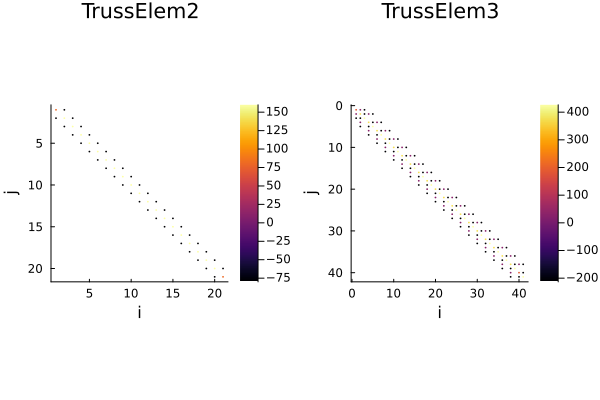

In [29]:
pspy2 = Plots.spy(𝐊g_2, xlabel="i", ylabel="j", title="TrussElem2")
pspy3 = Plots.spy(𝐊g_3, xlabel="i", ylabel="j", title="TrussElem3")
plot(pspy2, pspy3, layout=(1,2))

#### Plain code

In [30]:
# Define struct and functions

using Plots, LaTeXStrings
using GaussQuadrature, LinearAlgebra, Test
using ForwardDiff
using SparseArrays, FEMSparse

struct TrussElement2{I}
    id::I
    Nodes::Vector{I}
end
"""
    shapeFunctionL2(ξ::T)

Create a function to calculate the shape functions and their derivatives with the parametric coordinate xi.

N: Shape functions
dNdξ: derivatives w.r.t. ξ
ξ: natural coordinates (-1 ... +1)
"""
function shapeFunctionL2(ξ::T) where T
# shape function and derivatives for L2 elements

    N = [T(1) - ξ, T(1) + ξ] / 2
    dNdξ = [-T(0.5), T(0.5)]

    return N, dNdξ
end 
"""
    compute_J(telem::TrussElement2{I,T}, NodeDict::Dict, ξ::T)

compute the Jacobian of the parametric coordinate transformation
"""
function compute_J(Elem::TrussElement2{I}, NodeDict::Dict, ξ::T) where {I,T}
    J = (NodeDict[Elem.Nodes[2]] - NodeDict[Elem.Nodes[1]]) / 2
    return J
end
"""
    meshTruss2(xL::T, xR::T, nelem::I) where {T, I}


Create a mesh of a truss element with 2 node Langranian element
"""
function meshTruss2(xL::T, xR::T, nelem::I) where {T, I}
    @assert xR > xL
    NodeDict = Dict()
    ElemDict = Dict()

    le = (xR - xL) / nelem

    for ke in 1:nelem
        NodeDict[ke] = xL + (ke-1) * le
        ElemDict[ke] = TrussElement2(ke, [ke, ke+1])
    end
    NodeDict[nelem+1] = xR
    return NodeDict,ElemDict
end

struct TrussElement3{I}
    id::I
    Nodes::Vector{I}
end

"""
    shapeFunctionL3(ξ::T)

Create a function to calculate the shape functions and their derivatives with the parametric coordinate xi.

N: Shape functions
dNdξ: derivatives w.r.t. ξ
ξ: natural coordinates (-1 ... +1)
"""
function shapeFunctionL3(ξ::T) where T
# shape function and derivatives for L2 elements
    N(η) = [ η*(η - T(1)), η*(T(1)+η), 2*(T(1)-η)*(T(1)+η)] / 2
    dNdξ = ForwardDiff.derivative(N, ξ)

    return N(ξ), dNdξ
end 
"""
    meshTruss3(xL::T, xR::T, nelem::I) where {T, I}


Create a mesh of a truss element with 2 node Langranian element
"""
function meshTruss3(xL::T, xR::T, nelem::I) where {T, I}
    @assert xR > xL
    NodeDict = Dict()
    ElemDict = Dict()
    le = (xR - xL) / nelem
    for ke in 1:nelem
        NodeDict[2*(ke-1)+1] = xL + (ke-1) * le
        NodeDict[2*(ke-1)+2] = xL + (ke-1) * le +  le/2
        ElemDict[ke] = TrussElement3(ke, [2*(ke-1)+1, 2*(ke-1)+3, 2*(ke-1)+2])
    end
    NodeDict[2*nelem+1] = xR  
    return NodeDict, ElemDict
end
function compute_J(Elem::TrussElement3{I}, NodeDict::Dict, ξ::T) where {I,T}
    ~, 𝐁 = shapeFunctionL3(ξ)
    NodeCoords = [ NodeDict[i] for i ∈ Elem.Nodes]
    J = 𝐁 ⋅ NodeCoords
    return J
end
"""
    assignDOFs(ElemDict::Dict)

Assign DOFs to the elements
"""
function assignDOFs(ElemDict::Dict)

    DOFDict = Dict()
    dof_now = 0
    
    for ke ∈ sort(collect(keys(ElemDict)))  # here just to guarantee the order is sorted
        for nodeid ∈ ElemDict[ke].Nodes
            if nodeid ∉ keys(DOFDict)
                dof_now += 1
                DOFDict[nodeid] = Dict((1=>dof_now))
            end
        end
    end
    
    return DOFDict
end

struct BarInfo{T}
    E::T
    A::T
end

function compute_K_element(elem::TE, mat::BI, ξVec::Vector{T}, wVec::Vector{T}, NodeDict::Dict) where {T, TE, BI}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(ξVec)

    𝐊ᵉ = zeros(nbasefunc, nbasefunc)

    for q_point in 1:n_qpoint
        ξ = ξVec[q_point]
        w = wVec[q_point]
        dΩ = compute_J(elem, NodeDict, ξ) * w
        ~, 𝐁ᵉ = compute_BNmat(elem, ξ, NodeDict)
        𝐊ᵉ[:,:] .+= mat.E * mat.A * 𝐁ᵉ * 𝐁ᵉ' * dΩ
    end
    
    return 𝐊ᵉ
end

function compute_fb_element(elem::TE, b::T, ξVec::Vector{T}, wVec::Vector{T}, NodeDict::Dict) where {T, TE}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(ξVec)
    
    𝐟ᵉ = zeros(nbasefunc)

    for q_point ∈ 1:n_qpoint
        ξ = ξVec[q_point]
        w = wVec[q_point]
        dΩ = compute_J(elem, NodeDict, ξ) * w
        𝐍ᵉ, ~ = compute_BNmat(elem, ξ, NodeDict)
        𝐟ᵉ .+= 𝐍ᵉ * b * dΩ
    end
    return 𝐟ᵉ
end

function shapeFunction(elem::TrussElement2, ξ::T) where {T}
    return shapeFunctionL2(ξ)
end
function shapeFunction(elem::TrussElement3, ξ::T) where {T}
    return shapeFunctionL3(ξ)
end

function compute_BNmat(elem::TE, ξ::T, NodeDict::Dict) where {T, TE}
    nbasefunc = length(elem.Nodes)
    𝐍ᵉ = zeros(nbasefunc)
    𝐁ᵉ = zeros(nbasefunc)
    𝐍, 𝐁 = shapeFunction(elem, ξ)
    J = compute_J(elem, NodeDict, ξ)
    𝐍ᵉ .=  𝐍
    𝐁ᵉ .=  𝐁 / J
    return 𝐍ᵉ, 𝐁ᵉ
end

"""
    ndofs(DOFDict::Dict)

return the number of degrees of freedom in the system.
"""
function ndofs(DOFDict::Dict)
    ndof = 0
    for (nodeid, dofs) in DOFDict
        ndof += length(dofs)
    end
    return ndof
end

"""
    celldofs(elem::TE, DOFDict::Dict)

return the vector of degrees of freedom for the element.
"""
function celldofs(elem::TE, DOFDict::Dict) where {TE}
    return [ DOFDict[i][1] for i ∈ elem.Nodes]
end 

function Assemble_Kf(NodeDict::Dict, ElemDict::Dict, DOFDict::Dict, mat::BI, b::T, ξVec::Vector{T}, wVec::Vector{T}) where {T, BI}

    ndofs = length(DOFDict)
    
    𝐊 = spzeros(T, ndofs, ndofs)
    𝐟  = zeros(ndofs)

    for (kelem, elem) in ElemDict
        udofs = celldofs(elem, DOFDict)
        𝐊ᵉ = compute_K_element(elem, mat, ξVec, wVec, NodeDict)
        𝐟ᵉ = compute_fb_element(elem, b, ξVec, wVec, NodeDict)
        𝐊[udofs, udofs] .+= 𝐊ᵉ
        𝐟[udofs] .+= 𝐟ᵉ
    end

    return 𝐊, 𝐟
end

Assemble_Kf (generic function with 1 method)

In [31]:
## ! - - - - - - - - - Main program- - - - - - - - - - - - - - 

x_l = 0.0
x_r = 4.0
n_elem = 4

b = 3.0
𝔱 = 2.0
Ebar = 8.0
Abar = 2.0

barmat = BarInfo(Ebar, Abar)

NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, n_elem)
NodeDict_3, ElemDict_3 = meshTruss3(x_l, x_r, n_elem)

DOFDict_2 = assignDOFs(ElemDict_2)
DOFDict_3 = assignDOFs(ElemDict_3)

# Analytical solution
xVec = range(0, 4, length=100)
u_a(x) = -3/32*x^2 + 7/8*x
σ_a(x) = -3/2*x + 7

# determine the weights and parametric coordinates of gaussian 
ξVec, wVec = legendre(2)

𝐊g_2, 𝐟g_2 = Assemble_Kf(NodeDict_2, ElemDict_2, DOFDict_2, barmat, b, ξVec, wVec)
𝐟g_2[end] += 𝔱
𝐊g_3, 𝐟g_3 = Assemble_Kf(NodeDict_3, ElemDict_3, DOFDict_3, barmat, b, ξVec, wVec)
𝐟g_3[end-1] += 𝔱

2.499999999999999

#### Post-Process

In [32]:
function plot_element_disp!(p, xᵉ, uᵉ; 
    color=:blue, linewidth=2, marker=:o, markercolor=:blue, markersize=4)
    plot!(p, xᵉ, uᵉ, color=color, linewidth=linewidth, marker=marker, 
        markercolor=markercolor, markersize=markersize)
    return nothing 
end
function plot_disp_global!(p_disp, u::Vector{T}, NodeDict::Dict, ElemDict::Dict, DOFDict::Dict) where {T}
    for (elemid, elem) in ElemDict
        global_dofs = celldofs(elem, DOFDict)
        x_elem = [NodeDict[elem.Nodes[1]], NodeDict[elem.Nodes[2]]]
        u_elem = [u[global_dofs[1]], u[global_dofs[2]]]
        plot_element_disp!(p_disp, x_elem, u_elem)
    end
    return nothing 
end
function plot_disp_global(u::Vector{T}, NodeDict::Dict, ElemDict::Dict, DOFDict::Dict) where {T}
    p_disp = plot(leg=false, xlabel="x(m)", ylabel="u(m)")
    plot_disp_global!(p_disp, u, NodeDict, ElemDict, DOFDict)  
    return p_disp
end

function plot_stress_global!(p_stress, u, NodeDict, ElemDict, DOFDict, mat;color=:blue, linewidth=2)
    ξloc = [-1.0, 1.0]
    for (elemid, elem) in ElemDict
        global_dofs = celldofs(elem, DOFDict)
        x_elem = [NodeDict[i] for i ∈ elem.Nodes]
        u_elem = [u[i] for i ∈ global_dofs]
        σ_elem = zeros(2)
        for q_point in 1:2
            ξ = ξloc[q_point]
            𝐍ᵉ, 𝐁ᵉ = compute_BNmat(elem, ξ, NodeDict)
            ∂u∂x = 𝐁ᵉ ⋅ u_elem
            σ_elem[q_point] = barmat.E * ∂u∂x
        end
        plot!(p_stress, x_elem[1:2], σ_elem; color=color, linewidth=linewidth)
    end
    return nothing 
end
function plot_stress_global(u, NodeDict, ElemDict, DOFDict, mat) 
    p_σ= plot(leg=false, xlabel="x", ylabel="σ(Pa)")
    plot_stress_global!(p_σ, u, NodeDict, ElemDict, DOFDict, mat)  
    return p_σ
end



plot_stress_global (generic function with 1 method)

<!-- #### Applying Boundary Conditions -->
#### 施加位移边界条件
<!-- There are several methods to apply displacement boundary conditions. -->
施加位移边界条件主要有以下几种方法：

<!-- ##### Direct method (划行划列法) -->
##### 方法1：直接法 (划行划列法)
<!-- For a static problem the inertia term may be ignored and the expanded form of the matrices is given by -->
对于一个静态问题，惯性项可以忽略，那么劲度矩阵可以表示为
$$
\begin{bmatrix} 
K_{11}^1 & K_{12}^1             & 0                     &                           & \\
K_{21}^1 & (K_{21}^1+K_{11}^2)  & K_{12}^2              &                           & \\
0        & K_{21}^2             & (K_{22}^2+K_{11}^3)   & K_{12}^3                  &  \\
         &                      &                       & \ddots                    &  \\
         & 0                    & K_{21}^{M-1}          &(K_{22}^{M-1}+K_{11}^{M})  & K_{12}^{M} \\
         &                      &                       & K_{21}^{M}                & K_{22}^{M} \\
\end{bmatrix}
\begin{Bmatrix}
\widetilde{u}_1 \\
\widetilde{u}_2 \\
\widetilde{u}_3 \\
\vdots \\
\widetilde{u}_{N-1} \\
\widetilde{u}_N \\
\end{Bmatrix}
=
\begin{Bmatrix}
f_1 \\
f_2 \\
f_3 \\
\vdots \\
f_{N-1} \\
f_N \\
\end{Bmatrix}
$$
<!-- Up to this point we have not considered boundary conditions other than noting the end functions can serve as the boundary approximation. With the above finite element form it is very simple to impose the displacement boundary conditions since the parameters are now all physical values. That is they obey the property -->
到目前为止，除了注意到端部的函数可以作为边界的近似之外，我们还没有考虑其他的边界条件。利用上述有限元形式，施加位移边界条件非常简单，因为参数现在都是物理值。也就是说，它们遵循以下性质：
$$
\widehat{u}(x_a) \equiv \widetilde{u}_a
$$
<!-- Thus, if we wish to impose a displacement condition $u(0)=\overline{u}$, we set $\widetilde{u}_1=\overline{u}$ and rewrite as -->
因此，如果我们希望施加位移条件 $u(0)=\overline{u}$，我们令$\widetilde{u}_1=\overline{u}$并将其改写为：
$$
\begin{bmatrix} 
K_{11}^1 & 0                    & 0                     &                           & \\
0        & (K_{21}^1+K_{11}^2)  & K_{12}^2              &                           & \\
0        & K_{21}^2             & (K_{22}^2+K_{11}^3)   & K_{12}^3                  &  \\
         &                      &                       & \ddots                    &  \\
         & 0                    & K_{21}^{M-1}          &(K_{22}^{M-1}+K_{11}^{M})  & K_{12}^{M} \\
         &                      &                       & K_{21}^{M}                & K_{22}^{M} \\
\end{bmatrix}
\begin{Bmatrix}
\widetilde{u}_1 \\
\widetilde{u}_2 \\
\widetilde{u}_3 \\
\vdots \\
\widetilde{u}_{N-1} \\
\widetilde{u}_N \\
\end{Bmatrix}
=
\begin{Bmatrix}
K_{11}^1 \overline{u} \\
f_2 - K_{21}^1 \widetilde{u} \\
f_3 \\
\vdots \\
f_{N-1} \\
f_N \\
\end{Bmatrix}
$$

In [33]:
𝐊g_2_d = deepcopy(𝐊g_2)
Ktemp = 𝐊g_2_d[1,1]
𝐊g_2_d[1,:] .= 0.0
𝐊g_2_d[:,1] .= 0.0
𝐊g_2_d[1,1] = Ktemp

𝐟g_2_d = deepcopy(𝐟g_2)
𝐟g_2_d[1] = 0.0

𝐮_2_d =  𝐊g_2_d \  𝐟g_2_d;

𝐊g_3_d = deepcopy(𝐊g_3)
Ktemp = 𝐊g_3_d[1,1]
𝐊g_3_d[1,:] .= 0.0
𝐊g_3_d[:,1] .= 0.0
𝐊g_3_d[1,1] = Ktemp

𝐟g_3_d = deepcopy(𝐟g_3)
𝐟g_3_d[1] = 0.0

𝐮_3_d =  𝐊g_3_d \  𝐟g_3_d;

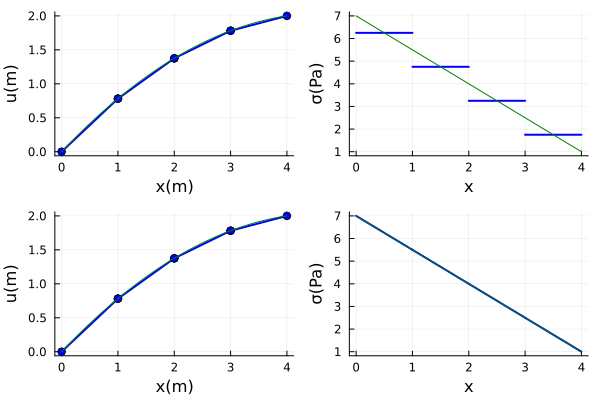

In [34]:
p_u2d = plot_disp_global(𝐮_2_d, NodeDict_2, ElemDict_2, DOFDict_2)
plot!(p_u2d, xVec, u_a.(xVec), color=:green, linewidth=1)
p_σ2d = plot_stress_global(𝐮_2_d, NodeDict_2, ElemDict_2, DOFDict_2, barmat)
plot!(p_σ2d, xVec, σ_a.(xVec), color=:green, linewidth=1)

p_u3d = plot_disp_global(𝐮_3_d, NodeDict_3, ElemDict_3, DOFDict_3)
plot!(p_u3d, xVec, u_a.(xVec), color=:green, linewidth=1)
p_σ3d = plot_stress_global(𝐮_3_d, NodeDict_3, ElemDict_3, DOFDict_3, barmat)
plot!(p_σ3d, xVec, σ_a.(xVec), color=:green, linewidth=1)

plot(p_u2d, p_σ2d, p_u3d, p_σ3d, layout=(2,2))

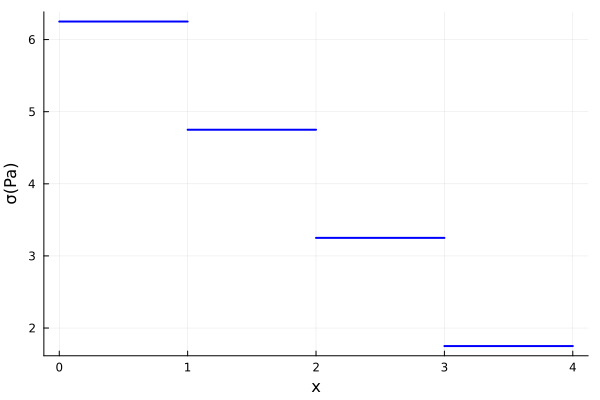

In [35]:

p_u3d = plot_disp_global(𝐮_3_d, NodeDict_3, ElemDict_3, DOFDict_3)
# plot!(p_u3d, xVec, u_a.(xVec), color=:green, linewidth=2)
p_σ2d = plot_stress_global(𝐮_2_d, NodeDict_2, ElemDict_2, DOFDict_2, barmat)

##### 方法二：罚函数法 (Penalty method)
<!-- Again, we first consider a conservative problem where the solution is determined by minimization. In the penalty method, the constraint is enforced by adding the square of the constraints, $g_Ig_I$, multiplied by a large number called the penalty parameter, to the potential. The modified potential is -->
同样，我们首先考虑一个保守问题，其解通过最小化确定。在罚函数法中，约束是通过在势函数中加入约束的平方$g_Ig_I$，并乘以一个称为罚参数的较大数值来强制执行的。修正后的势函数是：
$$
W_P(\mathbf{u})
=
W(\mathbf{u})
+
\frac{1}{2}
\beta
g_I(\mathbf{u})
g_I(\mathbf{u})
=
W
+
\frac{1}{2}
\beta
\mathbf{g}^\mathrm{T}\mathbf{g}
$$
<!-- where $\beta$ is the penalty parameter and the subscript $P$ indicates the penalty form of the potential. The penalty parameter is chosen to be orders of magnitude greater than other parameters of the problem. The idea is that if b is large enough, the minimum of $W_P(\mathbf{u})$ cannot be attained without satisfying the constraints. The stationary (or minimum) conditions give  -->
其中，$\beta$ 是罚参数，下标 $P$ 表示势函数的罚函数形式。罚参数的选择通常比问题的其他参数大几个数量级。其思想是，如果 $\beta$ 足够大，那么在不满足约束条件的情况下，无法获得 $W_P(\mathbf{u})$的最小值。定常（或最小）条件给出：

$$
\frac{\partial W_P}{\partial u_a}=\frac{\partial W}{\partial u_a}+\beta g_I\frac{\partial g_I}{\partial u_a}=0
\quad\mathrm{or}\quad
\mathbf{r}+\beta\mathbf{g}^\mathrm{T}\mathbf{G}=\mathbf{0}
$$
<!-- The linear model is -->
线形条件下，可以化简为
$$
\left(\frac{\partial r_a}{\partial u_b}+\beta\frac{\partial g_I}{\partial u_b}\frac{\partial g_I}{\partial u_a}+\beta g_I\frac{\partial^2g_I}{\partial u_a\partial u_b}\right)\Delta u_b=\left(-r_a-\beta g_I\frac{\partial g_I}{\partial u_a}\right)
$$
<!-- or in matrix form -->
或者给出矩阵形式
$$
\mathbf{A}_P\Delta\mathbf{u}=(\mathbf{A}+\beta\mathbf{G}^\mathrm{T}\mathbf{G}+\beta g_I\mathbf{H}_I)\Delta\mathbf{u}_b=-\mathbf{r}-\beta\mathbf{g}^T\mathbf{G}
$$
<!-- This system is the same size as the unconstrained system. For linear constraints, if $\mathbf{A} > 0$, then $\mathbf{A}_P > 0$, that is, if the original Jacobian matrix is positive-definite, then the augmented system is positive-definite. The major drawbacks of penalty methods is that they impair the conditioning of the equations and they require the selection of a penalty parameter. Often, it is not possible to make the penalty parameter large enough to satisfy the constraints accurately, and it is difficult to ascertain the error due to the approximate satisfaction of the constraints.  -->
这个系统的规模与无约束系统相同。对于线性约束，如果$\mathbf{A} > 0$，那么 $\mathbf{A}_P > 0$，也就是说，如果原始雅可比矩阵是正定的，那么增广系统也是正定的。罚函数法的主要缺点是会损害方程组的条件数，并且需要选择一个合适的罚参数。通常，无法将罚参数设置得足够大以精确地满足约束条件，并且难以确定由于近似满足约束而产生的误差。
<!-- The discrete equations for nonconservative systems are obtained with the guidance of the differential of the $W_P$ -->
非保守系统的离散方程可以通过对$W_P$取微分获得。
$$
0
=\mathrm{d}W_P(\mathbf{u})
=\mathrm{d}W + \frac{1}{2}\beta d(g_Ig_I)
=\mathrm{d}W + \beta g_I d(g_I)
$$

> 对于简单的边界条件而言，罚函数法等同于**置大数法**

In [36]:
β = 10

10

In [37]:

𝐊g_2_p = deepcopy(𝐊g_2)
𝐊g_2_p[1,1] *= β
𝐮_2_p = 𝐊g_2_p \  𝐟g_2;

In [38]:
𝐊g_3_p = deepcopy(𝐊g_3)
𝐊g_3_p[1,1] *= β
𝐮_3_p = 𝐊g_3_p \  𝐟g_3;

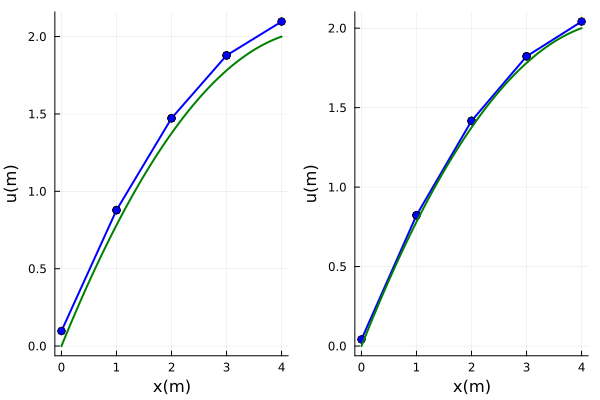

In [39]:
p_u2p = plot_disp_global(𝐮_2_p, NodeDict_2, ElemDict_2, DOFDict_2)
plot!(p_u2p, xVec, u_a.(xVec), color=:green, linewidth=2)
p_u3p = plot_disp_global(𝐮_3_p, NodeDict_3, ElemDict_3, DOFDict_3)
plot!(p_u3p, xVec, u_a.(xVec), color=:green, linewidth=2)
plot(p_u2p, p_u3p, layout=(1,2))


<!-- ##### Lagrange Multiplier Method -->
##### 拉格朗日乘子法（Lagrange Multiplier Method）
<!-- In this method, the constraints are appended to the objective function with Lagrange multipliers. In the conservative problem, the objective function, that is, the function to be minimized, is the potential. The minimization of a function subject to constraints can be posed as a Lagrange multiplier problem: the minimum of the function corresponds to the stationary points of the sum of the function and the constraints weighted by the Lagrange multipliers. The solution of $\partial W/\partial u = r$ is equivalent to finding the stationary points of -->
在这种方法中，约束通过拉格朗日乘子附加到目标函数上。在保守问题中，目标函数，即需要最小化的函数，是势函数。在约束条件下最小化函数可以转化为拉格朗日乘子问题：函数的最小值对应于函数与由拉格朗日乘子加权的约束之和的驻点。求解 $\partial W/\partial u = r$ 等价于寻找以下函数的驻点：
$$
W_{{_{L}}}=W+\lambda_{{_{I}}}g_{{_{I}}}\equiv W+\lambda^{T}\mathbf{g}
$$
<!-- where $\boldsymbol{\lambda} = {\lambda_I}$ are the Lagrange multipliers and the subscript $L$ indicates the Lagrange multiplier modified potential. At the equilibrium points -->
其中，$\boldsymbol{\lambda} = {\lambda_I}$ 是拉格朗日乘子，下标 L 表示拉格朗日乘子修正的势函数。在平衡点处：
$$
0=dW_{L}=dW+d(\lambda_{I}g_{I})\equiv dW+d(\boldsymbol{\lambda}^{T}\mathbf{g})\quad\forall d\mathbf{d}\quad\mathrm{and}\quad\forall d\boldsymbol{\lambda}
$$
<!-- Note that a stable equilibrium point is a minimum with respect to $\mathbf{u}$ and a maximum with respect to $\lambda$, that is, a saddle point. The derivatives of $W_L$ with respect to d and l vanish at the stationary point, so:  -->
注意，一个稳定的平衡点是关于 $\mathbf{u}$的最小值，并且是关于$\lambda$的最大值，也就是说，是一个鞍点。 $W_L$ 关于$\mathbf{u}$和$\lambda$的导数在驻点处消失，因此：
$$
\frac{\partial W_{L}}{\partial d_{a}}
=\frac{\partial W}{\partial d}+\lambda_{I} 
\frac{\partial g_{I}}{\partial d_{a}}\equiv r_{a}+\lambda_{I} \frac{\partial g_{I}}{\partial d_{a}}=0,\quad a=1 \mathrm{to} n_{\mathrm{dof}}\\g_{I}=0,\quad I=1\ \mathrm{to}\ n_\mathrm{c}
$$
<!-- The above is the system of $n_\mathrm{dof} + n_\mathrm{c}$ algebraic equations; note that repeated indices are summed. Governing equation can be rewritten as -->
以上是由$n_\mathrm{dof} + n_\mathrm{c}$个代数方程组成的方程组；注意重复的指标表示求和。控制方程可以改写为：
$$
f_a^{\mathrm{int}}-f_a^{\mathrm{ext}}+\lambda_I\frac{\partial g_I}{\partial d_a}=0\quad\mathrm{or}\quad\mathbf{f}^{\mathrm{int}}-\mathbf{f}^{\mathrm{ext}}+\mathbf{\lambda}^T\frac{\partial\mathbf{g}}{\partial\mathbf{d}}=0
$$
<!-- As can be seen in the above, the constraints introduce additional forces $\lambda_I \partial g_I / \partial d_a$, which are linear combinations of the Lagrange multipliers. If the constraints are linear, the additional forces are independent of the nodal displacements. -->
如上所示，约束引入了额外的力$\lambda_I \partial g_I / \partial d_a$，这些力是拉格朗日乘子的线性组合。如果约束是线性的，则这些额外的力与节点位移无关。
<!-- To obtain a linear model for the governing equation, we take a Taylor expansion and set the result to zero, giving -->
为了获得控制方程的线性模型，我们进行泰勒展开并将结果设为零，得到：
$$
\begin{aligned}
& 
r_a+\lambda_I \frac{\partial g_I}{\partial d_a}+\frac{\partial r_a}{\partial d_b} \Delta d_b+\frac{\partial g_I}{\partial d_a} \Delta\lambda_I+\lambda_I \frac{\partial^2 g_I}{\partial d_a\partial d_b}+\Delta d_b=0
\\
&
g_I \frac{\partial g_I}{\partial d_a}\Delta d_a=0
\end{aligned}
$$
<!-- Note the summations on repeated indices. To put this into matrix notation, we define -->
注意重复指标上的求和。为了将其写成矩阵形式，我们定义：
$$
\mathbf{G}=\left[G_{I_a}\right]=\left[\frac{\partial g_I}{\partial d_a}\right]\quad\mathbf{H}_I=\left[H_{ab}\right]_I=\left[\frac{\partial^2g_I}{\partial d_a\partial d_b}\right]
$$
<!-- In this notation the linear model (6.3.37–38) is -->
对于线性模型而言
$$
\begin{bmatrix}\mathbf{A}+\lambda_I\mathbf{H}_I&\mathbf{G}^T\\\mathbf{G}&\mathbf{0}\end{bmatrix}\begin{Bmatrix}\Delta\mathbf{d}\\\Delta\lambda\end{Bmatrix}=\begin{Bmatrix}-\mathbf{r}-\mathbf{\lambda}^T\mathbf{G}\\-\mathbf{g}\end{Bmatrix}
$$
where $\mathbf{A}$ is defined in (6.3.30). As can be seen in the above, the linear model has $n_\mathrm{c}$ additional equations due to the constraints. Even when the matrix $\mathbf{A}$ is positive-definite, the augmented system of equations will not be positive-definite because of the zeroes on the diagonal in the lower right-hand corner of the matrix.
其中$\mathbf{A}$在之前被定义。如上所示，由于约束，线性模型有 $n_\mathrm{c}$ 个额外的方程。即使当矩阵$\mathbf{A}$是正定时，由于矩阵右下角对角线上的零元素，增广方程组也不会是正定的。

<!-- For a linear statics problem with a linear constraints $\mathbf{G}\mathbf{d} = \mathbf{a}$, the equations are -->
对于具有线性约束$\mathbf{G}\mathbf{d} = \mathbf{a}$的线性静态问题，其方程为：
$$
\begin{bmatrix}
\mathbf{K} & \mathbf{G}^\mathrm{T} \\
\mathbf{G} & \mathbf{0}
\end{bmatrix}
=
\begin{Bmatrix}
\mathbf{u} \\
\mathbf{\lambda}
\end{Bmatrix}
=
\begin{Bmatrix}
\mathbf{f}^\mathrm{ext} \\
\mathbf{a}
\end{Bmatrix}
$$
<!-- where the following properties of the linear static system have been used:
1. $\mathbf{A}=\mathbf{K}$, where $\mathbf{K}$ is the linear stiffness;
2. $\mathbf{H}_I=\mathbf{0}$ for linear constraints;
3. The starting value is zero, $\Delta \mathbf{u} = \mathbf{u}$,$\Delta \mathbf{\lambda} = \mathbf{\lambda}$. -->
该式利用了线性静态系统的三个基本性质：
1. $\mathbf{A}=\mathbf{K}$， 其中 $\mathbf{K}$ 为线性刚度矩阵；
2. 线性条件下$\mathbf{H}_I = \mathbf{0}$；
3. 若初始值为零，则$\Delta \mathbf{u} = \mathbf{u}$,$\Delta \mathbf{\lambda} = \mathbf{\lambda}$


In [40]:
ndofs_2 = ndofs(DOFDict_2)
𝐊g_2_l = spzeros(ndofs_2+1, ndofs_2+1)
𝐊g_2_l[1:ndofs_2,1:ndofs_2] = 𝐊g_2[1:ndofs_2,1:ndofs_2]
𝐊g_2_l[ndofs_2+1, 1] = 1.0
𝐊g_2_l[1, ndofs_2+1] = 1.0
𝐟g_2_l = zeros(ndofs_2+1)
𝐟g_2_l[1:ndofs_2] .=  𝐟g_2[1:ndofs_2]
𝐮_2_l = 𝐊g_2_l \ 𝐟g_2_l


6-element Vector{Float64}:
  0.0
  0.78125
  1.375
  1.78125
  2.0
 14.0

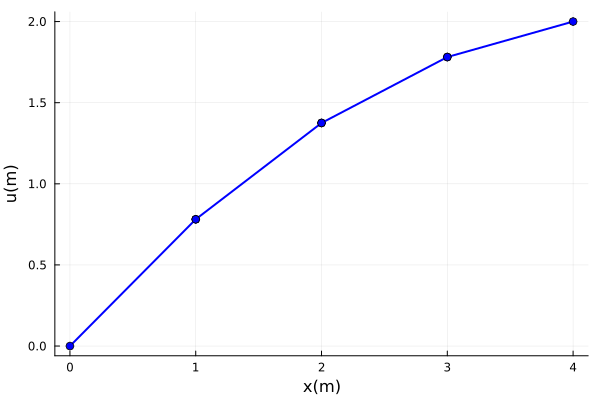

In [41]:
p_u2p = plot_disp_global(𝐮_2_l, NodeDict_2, ElemDict_2, DOFDict_2)

#### Optimize the coding

In [42]:
struct BarModel
    NodeDict::Dict
    ElemDict::Dict
    NSetDict::Dict
    ESetDict::Dict
    DOFDict::Dict
end

struct CellValues{T, I}
    𝐍::Vector{T}
    𝐁::Vector{T}
    xVec::Vector{T}
    ξVec::Vector{T}
    wVec::Vector{T}
    celldofs::Vector{I}
end

function celldofs!(cell_v::CellValues{T, I} ,elem::TE, DOFDict::Dict) where {TE, T, I}
    for (i, inodeid)  ∈ enumerate(elem.Nodes)
        cell_v.celldofs[i] = DOFDict[inodeid][1]
    end
end 

function getxcoord!(cell_v::CellValues{T, I} ,elem::TE, NodeDict::Dict) where {TE, T, I}
    for (i, inodeid)  ∈ enumerate(elem.Nodes)
        cell_v.xVec[i] = NodeDict[inodeid]
    end
end

function shapeFunctionL2!(N::Vector{T}, dNdξ::Vector{T}, ξ::T) where T
    # shape function and derivatives for L2 elements
    N[1] = (T(1) - ξ) / 2 
    N[2] = (T(1) + ξ) / 2

    dNdξ[1] = -T(0.5)
    dNdξ[2] =  T(0.5)
    return nothing
end 

function shapeFunctionL3!(N::Vector{T}, dNdξ::Vector{T}, ξ::T) where T
    # shape function and derivatives for L2 elements
    N[1] = ξ*(ξ - T(1))/2
    N[2] = ξ*(T(1)+ξ) /2 
    N[3] = (T(1)-ξ)*(T(1)+ξ)
    dNdξ[1] = ξ - 0.5
    dNdξ[2] = ξ + 0.5
    dNdξ[3] = - 2*ξ

    return nothing
end

function shapeFunction!(N::Vector{T}, dNdξ::Vector{T}, elem::TrussElement2, ξ::T) where {T}
    shapeFunctionL2!(N, dNdξ, ξ)
    return nothing
end
function shapeFunction!(N::Vector{T}, dNdξ::Vector{T}, elem::TrussElement3, ξ::T) where {T}
    shapeFunctionL3!(N, dNdξ, ξ)
    return nothing
end

function reinit!(cell_v::CellValues{T}, elem::TE, ξ::T) where {T, TE}
    shapeFunction!(cell_v.𝐍, cell_v.𝐁, elem, ξ)
    J = cell_v.𝐁 ⋅ cell_v.xVec
    cell_v.𝐁 ./= J
    return J
end

function compute_K_element!(𝐊ᵉ::Matrix, cell_v::CellValues{T}, elem::TE, mat::BI) where {T, TE, BI}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(cell_v.ξVec)

    fill!(𝐊ᵉ, 0.0)

    for q_point ∈ 1:n_qpoint
        ξ = cell_v.ξVec[q_point]
        w = cell_v.wVec[q_point]
        J = reinit!(cell_v, elem, ξ)
        dΩ = J * w
        for i in 1:nbasefunc
            for j in 1:nbasefunc
                𝐊ᵉ[i,j] += mat.E * mat.A * cell_v.𝐁[i] * cell_v.𝐁[j] * dΩ
            end
        end
        # // 𝐊ᵉ .+= mat.E * mat.A * cell_v.𝐁 * cell_v.𝐁' * dΩ
    end
    return nothing
end

function compute_fb_element!(𝐟ᵉ::Vector{T}, cell_v::CellValues{T}, elem::TE, b::T) where {T, TE}

    nbasefunc = length(elem.Nodes)
    n_qpoint = length(cell_v.ξVec)
    
    fill!(𝐟ᵉ, 0.0)

    for q_point ∈ 1:n_qpoint
        ξ = cell_v.ξVec[q_point]
        w = cell_v.wVec[q_point]
        J = reinit!(cell_v, elem, ξ)
        dΩ = J * w
        for i in 1:nbasefunc
            𝐟ᵉ[i] += cell_v.𝐍[i] * b * dΩ
        end
        # // 𝐟ᵉ .+= cell_v.𝐍 * b * dΩ
    end
    return nothing
end

function Assemble_Kf2(BarModel::BarModel, cell_v::CellValues, mat::BI, b::T) where {T, BI}

    totaldof = ndofs(BarModel.DOFDict)
    
    𝐊 = spzeros(T, totaldof, totaldof)
    𝐟  = zeros(totaldof)

    nbasefunc = length(cell_v.𝐍)

    𝐊ᵉ = zeros(nbasefunc, nbasefunc)
    𝐟ᵉ = zeros(nbasefunc)

    for (kelem, elem) in BarModel.ElemDict

        celldofs!(cell_v, elem, BarModel.DOFDict)
        getxcoord!(cell_v,elem, BarModel.NodeDict)

        compute_K_element!(𝐊ᵉ, cell_v, elem, mat)
        compute_fb_element!(𝐟ᵉ, cell_v, elem, b)

        𝐊[cell_v.celldofs, cell_v.celldofs] .+= 𝐊ᵉ
        𝐟[cell_v.celldofs] .+= 𝐟ᵉ
    end

    return 𝐊, 𝐟
end


function Assemble_Kf2s(BarModel::BarModel, cell_v::CellValues, mat::BI, b::T) where {T, BI}

    totaldof = ndofs(BarModel.DOFDict)
    
    # 𝐊 = spzeros(T, totaldof, totaldof)
    𝐊 = SparseMatrixCOO()
    𝐟  = zeros(totaldof)

    nbasefunc = length(cell_v.𝐍)

    𝐊ᵉ = zeros(nbasefunc, nbasefunc)
    𝐟ᵉ = zeros(nbasefunc)

    for (kelem, elem) in BarModel.ElemDict

        celldofs!(cell_v, elem, BarModel.DOFDict)
        getxcoord!(cell_v,elem, BarModel.NodeDict)

        compute_K_element!(𝐊ᵉ, cell_v, elem, mat)
        compute_fb_element!(𝐟ᵉ, cell_v, elem, b)

        # 𝐊[cell_v.celldofs, cell_v.celldofs] .+= 𝐊ᵉ
        𝐟[cell_v.celldofs] .+= 𝐟ᵉ

        add!(𝐊,cell_v.celldofs,cell_v.celldofs,𝐊ᵉ)
    end

    𝐊 = SparseMatrixCSC(𝐊) 

    return 𝐊, 𝐟
end

Assemble_Kf2s (generic function with 1 method)

In [43]:
x_l = 0.0
x_r = 4.0
n_elem = 10

b = 3.0
𝔱 = 2.0
Ebar = 8.0
Abar = 2.0

barmat = BarInfo(Ebar, Abar)

NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, n_elem)
DOFDict_2 = assignDOFs(ElemDict_2)

NSetDict_2 = Dict()
ESetDict_2 = Dict()

BarModel_2 = BarModel(NodeDict_2, ElemDict_2, NSetDict_2, ESetDict_2, DOFDict_2)

ξVec_2, wVec_2 = legendre(2)
cell_v_2 = CellValues(zeros(2),zeros(2),zeros(2),ξVec_2, wVec_2, zeros(Int64,2))

𝐊g_2, 𝐟g_2 = Assemble_Kf2s(BarModel_2, cell_v_2, barmat, b);
𝐟g_2[end] += 𝔱

𝐊g_2_d = deepcopy(𝐊g_2)
Ktemp = 𝐊g_2_d[1,1]
𝐊g_2_d[1,:] .= 0.0
𝐊g_2_d[:,1] .= 0.0
𝐊g_2_d[1,1] = Ktemp

𝐟g_2_d = deepcopy(𝐟g_2)
𝐟g_2_d[1] = 0.0

𝐮_2_d =  𝐊g_2_d \  𝐟g_2_d;

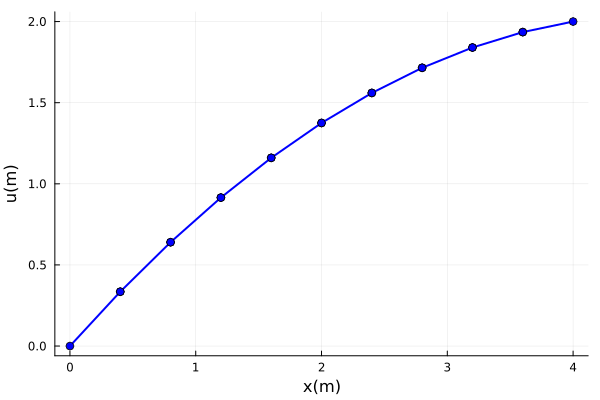

In [44]:
p_u2 = plot_disp_global(𝐮_2_d, BarModel_2.NodeDict, BarModel_2.ElemDict, BarModel_2.DOFDict)

In [45]:
using TimerOutputs, BenchmarkTools

In [46]:
function main1(;n_elem=10000)
    to=TimerOutput()
    @timeit to "initiation" begin
        x_l = 0.0
        x_r = 4.0

        b = 3.0
        𝔱 = 2.0
        Ebar = 8.0
        Abar = 2.0

        barmat = BarInfo(Ebar, Abar)

        NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, n_elem)
        DOFDict_2 = assignDOFs(ElemDict_2)

        # determine the weights and parametric coordinates of gaussian 
        ξVec, wVec = legendre(2)
    end

    @timeit to "assemble" begin
        𝐊g_2, 𝐟g_2 = Assemble_Kf(NodeDict_2, ElemDict_2, DOFDict_2, barmat, b, ξVec, wVec)
    end

    @timeit to "apply BC" begin
        𝐟g_2[end] += 𝔱

        Ktemp = 𝐊g_2[1,1]
        𝐊g_2[1,:] .= 0.0
        𝐊g_2[:,1] .= 0.0
        𝐊g_2[1,1] = Ktemp
        𝐟g_2 = deepcopy(𝐟g_2)
        𝐟g_2[1] = 0.0
    end

    @timeit to "solve" begin
    𝐮_2 =  𝐊g_2 \  𝐟g_2;
    end
    print(to)
    return nothing
end

function main2(;n_elem = 10000)
    to=TimerOutput()
    @timeit to "initiation" begin
        x_l = 0.0
        x_r = 4.0
        
        b = 3.0
        𝔱 = 2.0
        Ebar = 8.0
        Abar = 2.0
        
        barmat = BarInfo(Ebar, Abar)
        
        NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, n_elem)
        DOFDict_2 = assignDOFs(ElemDict_2)
        
        NSetDict_2 = Dict()
        ESetDict_2 = Dict()
        
        BarModel_2 = BarModel(NodeDict_2, ElemDict_2, NSetDict_2, ESetDict_2, DOFDict_2)
        
        ξVec_2, wVec_2 = legendre(2)
        cell_v_2 = CellValues(zeros(2),zeros(2),zeros(2),ξVec_2, wVec_2, zeros(Int64,2))
    end

    @timeit to "assemble" begin
        𝐊g_2, 𝐟g_2 = Assemble_Kf2(BarModel_2, cell_v_2, barmat, b);
    end

    @timeit to "apply BC" begin
        𝐟g_2[end] += 𝔱
        Ktemp = 𝐊g_2[1,1]
        𝐊g_2[1,:] .= 0.0
        𝐊g_2[:,1] .= 0.0
        𝐊g_2[1,1] = Ktemp

        𝐟g_2[1] = 0.0
    end
    @timeit to "solve" begin
        𝐮_2 =  𝐊g_2 \  𝐟g_2
    end
    print(to)
    return nothing
end


function main3(;n_elem = 10000)
    to=TimerOutput()
    @timeit to "initiation" begin
        x_l = 0.0
        x_r = 4.0
        
        b = 3.0
        𝔱 = 2.0
        Ebar = 8.0
        Abar = 2.0
        
        barmat = BarInfo(Ebar, Abar)
        
        NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, n_elem)
        DOFDict_2 = assignDOFs(ElemDict_2)
        
        NSetDict_2 = Dict()
        ESetDict_2 = Dict()
        
        BarModel_2 = BarModel(NodeDict_2, ElemDict_2, NSetDict_2, ESetDict_2, DOFDict_2)
        
        ξVec_2, wVec_2 = legendre(2)
        cell_v_2 = CellValues(zeros(2),zeros(2),zeros(2),ξVec_2, wVec_2, zeros(Int64,2))
    end

    @timeit to "assemble" begin
        𝐊g_2, 𝐟g_2 = Assemble_Kf2s(BarModel_2, cell_v_2, barmat, b);
    end

    @timeit to "apply BC" begin
        𝐟g_2[end] += 𝔱
        Ktemp = 𝐊g_2[1,1]
        𝐊g_2[1,:] .= 0.0
        𝐊g_2[:,1] .= 0.0
        𝐊g_2[1,1] = Ktemp

        𝐟g_2[1] = 0.0
    end
    @timeit to "solve" begin
        𝐮_2 =  𝐊g_2 \  𝐟g_2
    end
    print(to)
    return nothing
end

main3 (generic function with 1 method)

In [47]:
main1()

 ───────────────────────────────────────────────────────────────────────
                               Time                    Allocations      
                      ───────────────────────   ────────────────────────
   Tot / % measured:       296ms /  68.7%            643MiB /  97.1%    

 Section      ncalls     time    %tot     avg     alloc    %tot      avg
 ───────────────────────────────────────────────────────────────────────
 assemble          1    185ms   90.8%   185ms    609MiB   97.6%   609MiB
 initiation        1   16.0ms    7.8%  16.0ms   10.1MiB    1.6%  10.1MiB
 solve             1   2.76ms    1.4%  2.76ms   4.66MiB    0.7%  4.66MiB
 apply BC          1   14.7μs    0.0%  14.7μs   78.6KiB    0.0%  78.6KiB
 ───────────────────────────────────────────────────────────────────────

In [48]:
main2()

 ───────────────────────────────────────────────────────────────────────
                               Time                    Allocations      
                      ───────────────────────   ────────────────────────
   Tot / % measured:       167ms / 100.0%            586MiB / 100.0%    

 Section      ncalls     time    %tot     avg     alloc    %tot      avg
 ───────────────────────────────────────────────────────────────────────
 assemble          1    150ms   90.0%   150ms    572MiB   97.6%   572MiB
 apply BC          1   9.59ms    5.7%  9.59ms   29.7KiB    0.0%  29.7KiB
 initiation        1   5.75ms    3.4%  5.75ms   10.1MiB    1.7%  10.1MiB
 solve             1   1.38ms    0.8%  1.38ms   3.97MiB    0.7%  3.97MiB
 ───────────────────────────────────────────────────────────────────────

In [49]:
main3()

 ───────────────────────────────────────────────────────────────────────
                               Time                    Allocations      
                      ───────────────────────   ────────────────────────
   Tot / % measured:      24.2ms /  99.9%           23.9MiB / 100.0%    

 Section      ncalls     time    %tot     avg     alloc    %tot      avg
 ───────────────────────────────────────────────────────────────────────
 initiation        1   12.7ms   52.5%  12.7ms   10.1MiB   42.4%  10.1MiB
 assemble          1   10.2ms   42.3%  10.2ms   9.83MiB   41.1%  9.83MiB
 solve             1   1.24ms    5.1%  1.24ms   3.97MiB   16.6%  3.97MiB
 apply BC          1   17.7μs    0.1%  17.7μs     64.0B    0.0%    64.0B
 ───────────────────────────────────────────────────────────────────────

<!-- #### Error and convergence
- The solution $u(x)$ converges (i.e. the error decreases) to the exact solution $u_{\mathrm{ex}}(x)$ as the number of elements increase (i.e. as the element size $h\to 0$);
- The error $e$ can be measured using various norms:
$$
\|e\|_{L_2}=\left(\int\limits_{\varOmega}\left(u(x)-u_{\mathrm{ex}}(x)\right)^2 \mathrm{d}x\right)^{1/2}\
$$
$$
\|e\|_{\text{en}}=\left(\frac12\int\limits_{\varOmega}E\left(\frac{\mathrm{d}u(x)}{\mathrm{d}x}-\frac{\mathrm{d}u_{\text{ex}}(x)}{\mathrm{d}x}\right)^2\mathrm{d}x\right)^{1/2}
$$
- the $L_{2}$ norm measures the error in the displacement;
- the energy norm meansures the error in the internal energy (gradient of solution)
- the norm is always non-negative and ensures that positive and negative errors don't cancel -->

#### 误差与收敛性分析

- 当单元数量增加（即单元尺寸$h\to 0$）时，数值解$u(x)$将收敛于精确解$u_{\mathrm{ex}}(x)$，误差逐渐减小。
- 误差可以通过不同的范数进行度量：
$$
\|e\|_{L_2}=\left(\int\limits_{\varOmega}\left(u(x)-u_{\mathrm{ex}}(x)\right)^2 \mathrm{d}x\right)^{1/2}\
$$
$$
\|e\|_{\text{en}}=\left(\frac12\int\limits_{\varOmega}E\left(\frac{\mathrm{d}u(x)}{\mathrm{d}x}-\frac{\mathrm{d}u_{\text{ex}}(x)}{\mathrm{d}x}\right)^2\mathrm{d}x\right)^{1/2}
$$
- $L_{2}$范数衡量整体位移场的逼近程度；
- 能量范数反映应变能误差;
- 范数应具有：**非负性**：$\|e\| \geq 0$；**正定性**：防止正负误差相互抵消。  

In [50]:
function compute_error_L2(𝐮, cell_v, u_exact, BarModel)
    
    ϵ = 0.0

    for (kelem, elem) in BarModel.ElemDict

        nbasefunc = length(elem.Nodes)
        n_qpoint  = length(cell_v.ξVec)

        celldofs!( cell_v, elem, BarModel.DOFDict)
        getxcoord!(cell_v, elem, BarModel.NodeDict)
        
        for q_point ∈ 1:n_qpoint
            ξ = cell_v.ξVec[q_point]
            w = cell_v.wVec[q_point]
            J = reinit!(cell_v, elem, ξ)

            dΩ = J * w

            u_local = cell_v.𝐍 ⋅ 𝐮[cell_v.celldofs]
            x_local = cell_v.𝐍 ⋅ cell_v.xVec 

            ϵ += (u_exact(x_local) - u_local)^2 * dΩ

        end
    end
    return sqrt(ϵ)
end

function compute_error_en(𝐮, cell_v, du_exact, BarModel, barmat)
    
    ϵ = 0.0

    for (kelem, elem) in BarModel.ElemDict

        nbasefunc = length(elem.Nodes)
        n_qpoint  = length(cell_v.ξVec)

        celldofs!( cell_v, elem, BarModel.DOFDict)
        getxcoord!(cell_v, elem, BarModel.NodeDict)

        for q_point ∈ 1:n_qpoint
            ξ = cell_v.ξVec[q_point] 
            w = cell_v.wVec[q_point]
            J = reinit!(cell_v, elem, ξ)
            
            dΩ = J * w

            du_local = cell_v.𝐁 ⋅ 𝐮[cell_v.celldofs]
            x_local  = cell_v.𝐍 ⋅ cell_v.xVec 

            ϵ += barmat.E * ( du_exact(x_local) - du_local )^2 * dΩ
        end
    end
    
    return sqrt(ϵ*0.5)
end


compute_error_en (generic function with 1 method)

In [61]:
function compute_error_bar_2(;nelem=10)

    x_l = 0.0
    x_r = 4.0
    
    b = 3.0
    𝔱 = 2.0
    Ebar = 8.0
    Abar = 2.0
    
    barmat = BarInfo(Ebar, Abar)
    
    NodeDict_2, ElemDict_2 = meshTruss2(x_l, x_r, nelem)
    DOFDict_2 = assignDOFs(ElemDict_2)
    
    NSetDict_2 = Dict()
    ESetDict_2 = Dict()
    
    BarModel_2 = BarModel(NodeDict_2, ElemDict_2, NSetDict_2, ESetDict_2, DOFDict_2)
    
    ξVec_2, wVec_2 = legendre(7)
    cell_v_2 = CellValues(zeros(2),zeros(2),zeros(2),ξVec_2, wVec_2, zeros(Int64,2))

    𝐊g_2, 𝐟g_2 = Assemble_Kf2s(BarModel_2, cell_v_2, barmat, b);

    𝐟g_2[end] += 𝔱

    Ktemp = 𝐊g_2[1,1]
    𝐊g_2[1,:] .= 0.0
    𝐊g_2[:,1] .= 0.0
    𝐊g_2[1,1] = Ktemp
    𝐟g_2[1] = 0.0

    𝐮_2 =  𝐊g_2 \  𝐟g_2

    u_exact(x) = -3/32*x^2 + 7/8*x
    du_exact(x) = -3/16*x + 7/8

    @assert 𝐮_2[end] ≈ u_exact(4.0)

    ϵ_L2 = compute_error_L2(𝐮_2, cell_v_2, u_exact, BarModel_2)
    ϵ_en = compute_error_en(𝐮_2, cell_v_2, du_exact, BarModel_2, barmat)

    return ϵ_L2, ϵ_en
end

function compute_error_bar_3(;nelem=10)

    x_l = 0.0
    x_r = 4.0
    
    b = 3.0
    𝔱 = 2.0
    Ebar = 8.0
    Abar = 2.0

    nnode = nelem+1
    
    barmat = BarInfo(Ebar, Abar)
    
    NodeDict_3, ElemDict_3 = meshTruss3(x_l, x_r, nelem)
    DOFDict_3 = assignDOFs(ElemDict_3)
    
    NSetDict_3 = Dict()
    ESetDict_3 = Dict()
    
    BarModel_3 = BarModel(NodeDict_3, ElemDict_3, NSetDict_3, ESetDict_3, DOFDict_3)
    
    ξVec_3, wVec_3 = legendre(7)
    cell_v_3 = CellValues(zeros(3),zeros(3),zeros(3),ξVec_3, wVec_3, zeros(Int64,3))

    𝐊g_3, 𝐟g_3 = Assemble_Kf2s(BarModel_3, cell_v_3, barmat, b);

    𝐟g_3[BarModel_3.DOFDict[nnode][1]] += 𝔱

    Ktemp = 𝐊g_3[1,1]
    𝐊g_3[1,:] .= 0.0
    𝐊g_3[:,1] .= 0.0
    𝐊g_3[1,1] = Ktemp
    𝐟g_3[1] = 0.0

    𝐮_3 =  𝐊g_3 \  𝐟g_3

    u_exact(x) = -3/32*x^2 + 7/8*x
    du_exact(x) = -3/16*x + 7/8

    println(𝐮_3[BarModel_3.DOFDict[nnode][1]])
    @assert 𝐮_3[BarModel_3.DOFDict[nnode][1]] ≈ u_exact(4.0)

    ϵ_L2 = compute_error_L2(𝐮_3, cell_v_3, u_exact,  BarModel_3)
    ϵ_en = compute_error_en(𝐮_3, cell_v_3, du_exact, BarModel_3, barmat)

    return ϵ_L2, ϵ_en
end


compute_error_bar_3 (generic function with 1 method)

9

In [62]:
nelem_Vec = (2).^collect(1:10)
h_Vec = 4.0 ./ nelem_Vec

error_L2_2_Vec = zeros(length(nelem_Vec))
error_en_2_Vec = zeros(length(nelem_Vec))
error_L2_3_Vec = zeros(length(nelem_Vec))
error_en_3_Vec = zeros(length(nelem_Vec))

for (i, nelem_2) in enumerate(nelem_Vec)
    ϵ_L2, ϵ_en = compute_error_bar_2(nelem=nelem_2)
    error_L2_2_Vec[i] = ϵ_L2
    error_en_2_Vec[i] = ϵ_en
end
for (i, nelem_3) in enumerate(nelem_Vec)
    ϵ_L2, ϵ_en = compute_error_bar_3(nelem=nelem_3)
    error_L2_3_Vec[i] = ϵ_L2
    error_en_3_Vec[i] = ϵ_en
end

1.374999999999997


AssertionError: AssertionError: 𝐮_3[(BarModel_3.DOFDict[nnode])[1]] ≈ u_exact(4.0)

In [53]:
p_2_L2 = plot(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(p_2_L2, h_Vec, error_L2_2_Vec)
p_2_en = plot(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(p_2_en, h_Vec, error_en_2_Vec)
p_3_L2 = plot(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(p_3_L2, h_Vec, error_L2_3_Vec)
p_3_en = plot(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(p_3_en, h_Vec, error_en_3_Vec)

plot(p_2_L2 , p_3_L2, p_2_en, p_3_en, layout=(2,2))

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/peiliangbian/.juli